## Please click it firstly

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

autoscout24 =pd.read_csv('/content/drive/My Drive/pycoders/data_10_10_2022_1053.csv')
pd.set_option("display.max_columns", None)
autoscout24.head(2)

,Unnamed: 0,Unnamed: 0.1,make,model,price,mileage,fuel_type,seller,body_type,type,drivetrain,seats,doors,Warranty_Months,full_service_history,non_smoker_vehicle,Gearbox,Engine_Size_cc,gears,cylinders,Empty_Weight_kg,co2_emissions,Emission_Class_Euro,colour,Paint,Upholstery_Color,upholstery,location,fuel_city,fuel_country,fuel_comb,Power_kW,First_Registration_Year,2_zones,360°_camera,3_zones,4_zones,Air_conditioning,Air_suspension,Armrest,Automatic_climate_control,Auxiliary_heating,Cruise_control,Electric_backseat_adjustment,Electric_tailgate,Electrical_side_mirrors,Electrically_adjustable_seats,Electrically_heated_windshield,Fold_flat_passenger_seat,Heads_up_display,Heated_steering_wheel,Hill_Holder,Keyless_central_door_lock,Leather_seats,Leather_steering_wheel,Light_sensor,Lumbar_support,Massage_seats,Multi_function_steering_wheel,Navigation_system,Panorama_roof,Park_Distance_Control,Parking_assist_system_camera,Parking_assist_system_self_steering,Parking_assist_system_sensors_front,Parking_assist_system_sensors_rear,Power_windows,Rain_sensor,Seat_heating,Seat_ventilation,Sliding_door_left,Sliding_door_right,Split_rear_seats,Start_stop_system,Sunroof,Tinted_windows,Wind_deflector,ABS,Adaptive_Cruise_Control,Adaptive_headlights,Alarm_system,Bi_Xenon_headlights,Blind_spot_monitor,Central_door_lock,Central_door_lock_with_remote_control,Daytime_running_lights,Distance_warning_system,Driver_drowsiness_detection,Driver_side_airbag,Electronic_stability_control,Emergency_brake_assistant,Emergency_system,Fog_lights,Full_LED_headlights,Glare_free_high_beam_headlights,Head_airbag,High_beam_assist,Immobilizer,Isofix,LED_Daytime_Running_Lights,LED_Headlights,Lane_departure_warning_system,Laser_headlights,Night_view_assist,Passenger_side_airbag,Power_steering,Rear_airbag,Side_airbag,Speed_limit_control_system,Tire_pressure_monitoring_system,Traction_control,Traffic_sign_recognition,Xenon_headlights,Android_Auto,Apple_CarPlay,Bluetooth,CD_player,Digital_cockpit,Digital_radio,Hands_free_equipment,Induction_charging_for_smartphones,Integrated_music_streaming,MP3,On_board_computer,Radio,Sound_system,Television,USB,WLAN_/_WiFi_hotspot,make_model
0,0,0,Audi,A3,4450,191066,Gasoline,Dealer,Compact,Used,Front,5,3,6,1,0,Automatic,1984,7,4.0,1280,110,4,Grey,Metallic,Black,Cloth,LOON OP ZAND,4.8,34.0,4.9,110,2003,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Audi A3
1,1,1,Audi,A3,12950,94758,Gasoline,Dealer,Compact,Used,Front,5,5,6,1,0,Automatic,1395,7,4.0,1200,110,6,White,Metallic,Black,Cloth,HEERLEN,4.8,34.0,4.9,92,2013,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Audi A3


In [ ]:
a = autoscout24.location.unique()


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ord_enc = OrdinalEncoder()
B = ord_enc.fit_transform(autoscout24[["fuel_type"]])
B


array([[6.],
       [6.],
       [6.],
       ...,
       [8.],
       [8.],
       [8.]])

In [ ]:
# autoscout24['fuel_type'].inverse_transformation()
X = ord_enc.inverse_transform(B)
X

array([['Gasoline'],
       ['Gasoline'],
       ['Gasoline'],
       ...,
       ['LPG'],
       ['LPG'],
       ['LPG']], dtype=object)

In [ ]:
B.get_params(deep=True)

AttributeError: ignored

In [ ]:
# df.fuel_comb.unique()
# df.fuel_city.unique()
# df.fuel_city.value_counts()
# df.fuel_comb.value_counts()

## Filling Codes

In [ ]:
# Grup Sutununa(group_col) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini ffill & bfill ile doldurur.
# Hala null deger kalma ihtimaline binaen, gruplama yapmaksizin, uzerinde calisilan sutunda da(col_name) ekstradan ffill & bfill yapar
def fill_prop(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        grp_inx = list(df[cond][col_name].index)
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))
# Grup Sutununa(group_col) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini mode ile doldurur.
def fill_most(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        grp_inx = list(df[cond][col_name].index)
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond][col_name].mode()[0])
        else:
            df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[col_name].mode()[0])
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))
# Grup Sutunlarina(group_col1 ve group_col2) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini "mode" or "median" or "ffill & bfill ile doldurur.
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill/bfill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if (mode1 != []) and (mode2 != []):
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond2][col_name].mode()[0]).fillna(df[cond1][col_name].mode()[0])
                elif mode1 != []:
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond1][col_name].mode()[0])
                else:
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))
def null_values(df, rate=0):
    """a function to show null values with percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv['Percentage (%)']>rate].sort_values('Percentage (%)', ascending=False)

In [ ]:
df.head()

,Unnamed: 0,make,model,price,mileage,fuel_type,seller,body_type,type,drivetrain,seats,doors,Warranty_Months,full_service_history,non_smoker_vehicle,Gearbox,Engine_Size_cc,gears,cylinders,Empty_Weight_kg,co2_emissions,Emission_Class_Euro,colour,Paint,Upholstery_Color,upholstery,location,fuel_city,fuel_country,fuel_comb,Power_kW,First_Registration_Year,2_zones,360°_camera,3_zones,4_zones,Air_conditioning,Air_suspension,Armrest,Automatic_climate_control,Auxiliary_heating,Cruise_control,Electric_backseat_adjustment,Electric_tailgate,Electrical_side_mirrors,Electrically_adjustable_seats,Electrically_heated_windshield,Fold_flat_passenger_seat,Heads_up_display,Heated_steering_wheel,Hill_Holder,Keyless_central_door_lock,Leather_seats,Leather_steering_wheel,Light_sensor,Lumbar_support,Massage_seats,Multi_function_steering_wheel,Navigation_system,Panorama_roof,Park_Distance_Control,Parking_assist_system_camera,Parking_assist_system_self_steering,Parking_assist_system_sensors_front,Parking_assist_system_sensors_rear,Power_windows,Rain_sensor,Seat_heating,Seat_ventilation,Sliding_door_left,Sliding_door_right,Split_rear_seats,Start_stop_system,Sunroof,Tinted_windows,Wind_deflector,ABS,Adaptive_Cruise_Control,Adaptive_headlights,Alarm_system,Bi_Xenon_headlights,Blind_spot_monitor,Central_door_lock,Central_door_lock_with_remote_control,Daytime_running_lights,Distance_warning_system,Driver_drowsiness_detection,Driver_side_airbag,Electronic_stability_control,Emergency_brake_assistant,Emergency_system,Fog_lights,Full_LED_headlights,Glare_free_high_beam_headlights,Head_airbag,High_beam_assist,Immobilizer,Isofix,LED_Daytime_Running_Lights,LED_Headlights,Lane_departure_warning_system,Laser_headlights,Night_view_assist,Passenger_side_airbag,Power_steering,Rear_airbag,Side_airbag,Speed_limit_control_system,Tire_pressure_monitoring_system,Traction_control,Traffic_sign_recognition,Xenon_headlights,Android_Auto,Apple_CarPlay,Bluetooth,CD_player,Digital_cockpit,Digital_radio,Hands_free_equipment,Induction_charging_for_smartphones,Integrated_music_streaming,MP3,On_board_computer,Radio,Sound_system,Television,USB,WLAN_/_WiFi_hotspot,make_model
0,0,Audi,A3,4450,191066,Gasoline,Dealer,Compact,Used,Front,5,3,6,1,0,Automatic,1984,7,4.0,1280,110,4,Grey,Metallic,Black,Cloth,LOON OP ZAND,NaN,NaN,4.9,110,2003,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Audi A3
1,1,Audi,A3,12950,94758,Gasoline,Dealer,Compact,Used,Front,5,5,6,1,0,Automatic,1395,7,4.0,1200,110,6,White,Metallic,Black,Cloth,HEERLEN,NaN,NaN,4.9,92,2013,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Audi A3
2,2,Audi,A3,12445,160883,Gasoline,Dealer,Compact,Used,Front,5,5,6,0,0,Automatic,1395,7,4.0,1200,116,6,Black,Metallic,Black,Cloth,BREDA,NaN,NaN,5.0,90,2013,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,Audi A3
3,3,Audi,A1,12450,145102,Gasoline,Dealer,Compact,Used,Front,5,5,6,1,1,Automatic,1395,7,4.0,1015,118,6,Grey,Metallic,Black,Partleather,BAARLE-NASSAU,NaN,NaN,4.8,92,2015,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,Audi A1
4,4,Audi,A1,14945,119666,Gasoline,Dealer,Compact,Used,Front,4,3,6,1,0,Automatic,1395,7,4.0,1105,111,6,Black,Metallic,Black,Partleather,ZUTPHEN,NaN,NaN,4.8,92,2015,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,Audi A1


## Cleaning Codes_ao

In [ ]:
#Splitting location by "," , dropping location and country , renamed 'city' to 'location'
import pandas as pd
import numpy as np
df[['city', 'country','none']] = df['location'].str.split(',', expand=True)
df = df.drop('location', axis=1)
df = df.drop('country', axis=1)
df = df.drop('none', axis=1)
df.rename(columns={'city': 'location'}, inplace=True)

In [ ]:
# Dropping extras column
df = df.drop('extras', axis=1)

In [ ]:
# Cleaning mileage column
df['mileage'] = df['mileage'].replace("\W", '',regex = True)
df['mileage'] = df['mileage'].replace("km", '',regex = True)
df['mileage'] = df['mileage'].replace("\D", '',regex = True)
df['mileage'] = df['mileage'].replace(" ", '',regex = True)

In [ ]:
# Fuel
df_fuel = df['fuel_consumption'].str.split(',', expand=True)

df_fuel = df_fuel.drop(0, axis=1)
df_fuel = df_fuel.drop(4, axis=1)

df_fuel.rename(columns={1: 'fuel_comb'}, inplace=True) 
df_fuel.rename(columns={2: 'fuel_city'}, inplace=True) 
df_fuel.rename(columns={3: 'fuel_country'}, inplace=True) 

df_1 = df_fuel['fuel_comb'].str.split('/', expand=True)
df_1 = df_1.drop(1, axis=1)
df_fuel['fuel_comb'] = df_1[0].str.replace("[", '').astype(str)
df_fuel['fuel_comb'] = df_fuel['fuel_comb'].replace("'", "", regex = True)
df_fuel['fuel_comb'] = df_fuel['fuel_comb'].str.replace("l", '').astype(str)
df_fuel['fuel_comb'] = df_fuel['fuel_comb'].str.replace("kg", '').astype(str)
df_fuel['fuel_comb'] = df_fuel['fuel_comb'].str.replace("\\n", '').astype(str)
df_fuel['fuel_comb'] = df_fuel['fuel_comb'].replace("0", "", regex = True)
df_fuel['fuel_comb'] = df_fuel['fuel_comb'].replace(" ", "", regex = True)


df_2 = df_fuel['fuel_city'].str.split('l', expand=True)
df_2 = df_2.drop(1, axis=1)
df_fuel['fuel_city'] = df_2[0].str.replace("[", '').astype(str)
df_fuel['fuel_city'] = df_fuel['fuel_city'].replace("'", "", regex = True)
df_fuel['fuel_city'] = df_fuel['fuel_city'].str.replace("l", '').astype(str)
df_fuel['fuel_city'] = df_fuel['fuel_city'].str.replace("kg", '').astype(str)
df_fuel['fuel_city'] = df_fuel['fuel_city'].str.replace("\\n", '').astype(str)
df_fuel['fuel_city'] = df_fuel['fuel_city'].replace("0", "", regex = True)



df_3 = df_fuel['fuel_country'].str.split('l', expand=True)
df_3 = df_3.drop(1, axis=1)
df_fuel['fuel_country'] = df_3[0].str.replace("[", '').astype(str)
df_fuel['fuel_country'] = df_fuel['fuel_country'].replace("'", "", regex = True)
df_fuel['fuel_country'] = df_fuel['fuel_country'].str.replace("l", '').astype(str)
df_fuel['fuel_country'] = df_fuel['fuel_country'].str.replace("kg", '').astype(str)
df_fuel['fuel_country'] = df_fuel['fuel_country'].str.replace("\\n", '').astype(str)
df_fuel['fuel_country'] = df_fuel['fuel_country'].replace("0", "", regex = True)
df_fuel['fuel_country'] = df_fuel['fuel_country'].replace(" ", "", regex = True)





df = df.drop('fuel_consumption', axis=1)


df['fuel_city']=df_fuel['fuel_city']
df['fuel_country']=df_fuel['fuel_country']
df['fuel_comb']=df_fuel['fuel_comb']

In [ ]:
df['fuel_country'] = df['fuel_country'].replace("\D", "", regex = True)

In [ ]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['fuel_country'] = df['fuel_country'].str.replace(char, '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
df['price'] = df['price'].replace("\W", "", regex = True)
df['price'] = df['price'].replace("n", '',regex = True)
df['price'] = df['price'].str.replace(" ", '').astype(str)


df['doors'] = df['doors'].replace("\n", ' ',regex = True)
df['doors'] = df['doors'].replace(" ", '',regex = True)


df['gears'] = df['gears'].replace("\W", ' ',regex = True)
df['gears'] = df['gears'].str.strip()


df.rename(columns={'\ncolour': 'colour'}, inplace=True)

df['colour'] = df['colour'].replace("\n", '',regex = True)
df['colour'] = df['colour'].replace("\d", '',regex = True)
df['colour'] = df['colour'].replace(", ", '',regex = True)


df = df.drop('Mileage', axis=1)  #iki mileage var bu icinde sadece semboller var onun icin silindi

df = df.drop('url', axis=1)


df['make'] = df['make'].replace("\n", '',regex = True)
df['make'] = df['make'].replace(",", '',regex = True)

df['model'] = df['model'].replace("\n", '',regex = True)
df['model'] = df['model'].replace(",", '',regex = True)

df['fuel_type'] = df['fuel_type'].replace("\n", '',regex = True)
df['fuel_type'] = df['fuel_type'].replace(",", '',regex = True)

df = df.drop('last_service', axis=1)

df = df.drop('short_description', axis=1)

df.rename(columns={' upholstery ': 'upholstery'}, inplace=True)

df_up = df['upholstery'].str.split(',', expand=True)
df_up = df_up.drop(0, axis=1)
df_up[1] = df_up[1].str.replace(" ", '').astype(str)

df['upholstery']=df_up[1]


In [ ]:
df.head()

,Unnamed: 0,make,model,price,mileage,fuel_type,seller,body_type,type,drivetrain,seats,doors,Warranty_Months,full_service_history,non_smoker_vehicle,Gearbox,Engine_Size_cc,gears,cylinders,Empty_Weight_kg,co2_emissions,Emission_Class_Euro,colour,Paint,Upholstery_Color,upholstery,location,fuel_city,fuel_country,fuel_comb,Power_kW,First_Registration_Year,2_zones,360°_camera,3_zones,4_zones,Air_conditioning,Air_suspension,Armrest,Automatic_climate_control,Auxiliary_heating,Cruise_control,Electric_backseat_adjustment,Electric_tailgate,Electrical_side_mirrors,Electrically_adjustable_seats,Electrically_heated_windshield,Fold_flat_passenger_seat,Heads_up_display,Heated_steering_wheel,Hill_Holder,Keyless_central_door_lock,Leather_seats,Leather_steering_wheel,Light_sensor,Lumbar_support,Massage_seats,Multi_function_steering_wheel,Navigation_system,Panorama_roof,Park_Distance_Control,Parking_assist_system_camera,Parking_assist_system_self_steering,Parking_assist_system_sensors_front,Parking_assist_system_sensors_rear,Power_windows,Rain_sensor,Seat_heating,Seat_ventilation,Sliding_door_left,Sliding_door_right,Split_rear_seats,Start_stop_system,Sunroof,Tinted_windows,Wind_deflector,ABS,Adaptive_Cruise_Control,Adaptive_headlights,Alarm_system,Bi_Xenon_headlights,Blind_spot_monitor,Central_door_lock,Central_door_lock_with_remote_control,Daytime_running_lights,Distance_warning_system,Driver_drowsiness_detection,Driver_side_airbag,Electronic_stability_control,Emergency_brake_assistant,Emergency_system,Fog_lights,Full_LED_headlights,Glare_free_high_beam_headlights,Head_airbag,High_beam_assist,Immobilizer,Isofix,LED_Daytime_Running_Lights,LED_Headlights,Lane_departure_warning_system,Laser_headlights,Night_view_assist,Passenger_side_airbag,Power_steering,Rear_airbag,Side_airbag,Speed_limit_control_system,Tire_pressure_monitoring_system,Traction_control,Traffic_sign_recognition,Xenon_headlights,Android_Auto,Apple_CarPlay,Bluetooth,CD_player,Digital_cockpit,Digital_radio,Hands_free_equipment,Induction_charging_for_smartphones,Integrated_music_streaming,MP3,On_board_computer,Radio,Sound_system,Television,USB,WLAN_/_WiFi_hotspot,make_model
0,0,Audi,A3,4450,191066,Gasoline,Dealer,Compact,Used,Front,5,3,6,1,0,Automatic,1984,7,4.0,1280,110,4,Grey,Metallic,Black,Cloth,LOON OP ZAND,6.0,43,4.9,110,2003,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Audi A3
1,1,Audi,A3,12950,94758,Gasoline,Dealer,Compact,Used,Front,5,5,6,1,0,Automatic,1395,7,4.0,1200,110,6,White,Metallic,Black,Cloth,HEERLEN,6.0,43,4.9,92,2013,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Audi A3
2,2,Audi,A3,12445,160883,Gasoline,Dealer,Compact,Used,Front,5,5,6,0,0,Automatic,1395,7,4.0,1200,116,6,Black,Metallic,Black,Cloth,BREDA,6.0,43,5.0,90,2013,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,Audi A3
3,3,Audi,A1,12450,145102,Gasoline,Dealer,Compact,Used,Front,5,5,6,1,1,Automatic,1395,7,4.0,1015,118,6,Grey,Metallic,Black,Partleather,BAARLE-NASSAU,5.9,42,4.8,92,2015,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,Audi A1
4,4,Audi,A1,14945,119666,Gasoline,Dealer,Compact,Used,Front,4,3,6,1,0,Automatic,1395,7,4.0,1105,111,6,Black,Metallic,Black,Partleather,ZUTPHEN,5.9,42,4.8,92,2015,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,Audi A1


In [ ]:
df = df.replace("None",np.nan)
df = df.replace("nan",np.nan)
df = df.replace("NaN",np.nan)
df = df.replace("",np.nan)

In [ ]:
df['fuel_country'].isnull().sum()

30990

## Cleaning Codes_bs

In [ ]:
#changing columns names
df.rename(columns={'\nComfort & Convenience\n': 'Comfort_Convenience', '\nSafety & Security\n': 'Safety_Security'}, inplace=True)
df.rename(columns={'\nmanufacturer_color': 'manufacturer_color'}, inplace=True)
df.rename(columns={'co2_emissions_(g_km)': 'co2_emissions'}, inplace=True)

In [ ]:
#drop columns
df = df.drop('manufacturer_color', axis=1)
df = df.drop('gearbox', axis=1)
df = df.drop('previous_owner', axis=1)
df = df.drop('offer_number', axis=1)
df = df.drop('country_version', axis=1)

In [ ]:
#showing all columns
import pandas as pd
pd.set_option("display.max_columns", None)
df.head()

,make,model,price,mileage,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,warranty,first_registration,production_date,general_inspection,full_service_history,non_smoker_vehicle,last_timing_belt_change,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,co2_emissions,emission_class,emissions_sticker,Comfort_Convenience,\nEntertainment & Media\n,Safety_Security,colour,\npaint,upholstery_colour,upholstery,location,fuel_city,fuel_country,fuel_comb
0,Audi,A3,4450,191066,Aug-03,Gasoline,"110 kW (150 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n5,3,"\n,6 months,\n",Aug-03,NaN,May-22,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","\n,110 kW (150 hp),\n","\n,Automatic,\n","\n,1,984 cc,\n",NaN,"\n,4,\n","\n,1,280 kg,\n","\n,Super 95,\n","['\n', [' ', ' ', ' '], '\n']","\n,Euro 4,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', ...",Grey,"\npaint, Metallic","\nupholstery, Black",Cloth,LOON OP ZAND,NaN,NaN,NaN
1,Audi,A3,12950,94758,Oct-13,Gasoline,"92 kW (125 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n5,5,"\n,None,\n",Oct-13,NaN,NaN,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","\n,92 kW (125 hp),\n","\n,Automatic,\n","\n,1,395 cc,\n",NaN,"\n,4,\n","\n,1,200 kg,\n","\n,Gasoline,\n","\n,None,\n","\n,None,\n","\n,None,\n","[['Air conditioning', 'Automatic climate contr...","[['CD player', 'Radio']]","[['Alarm system', 'Central door lock', 'Centra...",White,NaN,"\nupholstery, Black",Cloth,HEERLEN,NaN,NaN,4.9
2,Audi,A3,12445,160883,May-13,Gasoline,"90 kW (122 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,None,\n",\n5,5,"\n,None,\n",May-13,NaN,Mar-22,"\n,None,\n","\n,None,\n","[['\n'], ['None']]","\n,90 kW (122 hp),\n","\n,Automatic,\n","\n,1,395 cc,\n",NaN,"\n,4,\n","\n,1,200 kg,\n","\n,Gasoline,\n","\n,116 g/km (comb.),\n","\n,None,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Cruise contr...","[['Bluetooth', 'CD player', 'Hands-free equipm...","[['ABS', 'Central door lock', 'Central door lo...",Black,"\npaint, Metallic",NaN,NaN,BREDA,NaN,NaN,5
3,Audi,A1,12450,145102,Jun-15,Gasoline,"92 kW (125 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,None,\n",\n5,5,"\n,6 months,\n",Jun-15,2015,New,"\n,Yes,\n","\n,Yes,\n","[['\n'], ['None']]","\n,92 kW (125 hp),\n","\n,Automatic,\n","\n,1,395 cc,\n",NaN,"\n,4,\n","\n,None,\n","\n,Gasoline,\n","\n,None,\n","\n,None,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['Bluetooth', 'CD player', 'On-board computer...","[['ABS', 'Central door lock with remote contro...",Grey,"\npaint, Metallic",NaN,NaN,BAARLE-NASSAU,NaN,NaN,NaN
4,Audi,A1,14945,119666,Oct-15,Gasoline,"92 kW (125 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n4,3,"\n,6 months,\n",Oct-15,NaN,NaN,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","\n,92 kW (125 hp),\n","\n,Automatic,\n","\n,1,395 cc,\n",7,"\n,4,\n","\n,1,105 kg,\n","\n,Gasoline,\n","\n,111 g/km (comb.),\n","\n,Euro 6,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'MP3', 'On-board computer', 'Ra...","[['ABS', 'Alarm system', 'Bi-Xenon headlights'...",Black,NaN,"\nupholstery, Black",Partleather,ZUTPHEN,5.9,42,4.8


In [ ]:
#cleaning dataframe
import re
import numpy as np

df['Comfort_Convenience'] = df['Comfort_Convenience'].replace("]", "", regex = True)
df['Comfort_Convenience'] = df['Comfort_Convenience'].replace("'", "", regex = True)
df['Comfort_Convenience'] = df['Comfort_Convenience'].str.replace('[', '').astype(str)
df['Comfort_Convenience'] = df['Comfort_Convenience'].str.replace('1', '').astype(str)
df['Safety_Security'] = df['Safety_Security'].str.replace('[', '').astype(str)
df['Safety_Security'] = df['Safety_Security'].str.replace('1', '').astype(str)
df['Safety_Security'] = df['Safety_Security'].replace("]", "", regex = True)
df['Safety_Security'] = df['Safety_Security'].replace("'", "", regex = True)
df['co2_emissions'] = df['co2_emissions'].replace(",", "", regex = True)
df['co2_emissions'] = df['co2_emissions'].replace("\n", "", regex = True)
df['co2_emissions_(g_km)'] = df['co2_emissions'].replace("]", "", regex = True)
df['co2_emissions'] = df['co2_emissions'].replace("'", "", regex = True)
df['co2_emissions'] = df['co2_emissions'].str.replace('[', '').astype(str)
df['co2_emissions'] = df['co2_emissions'].str.replace("(comb.)","").astype(str)
df['co2_emissions'] = df['co2_emissions'].replace(" ", "", regex = True)
df['co2_emissions'] = df['co2_emissions'].str.replace("g/km()","").astype(str)
df['co2_emissions'] = df['co2_emissions'].str.replace(")","").astype(str)
df['co2_emissions'] = df['co2_emissions'].str.replace("(","").astype(str)
df['body_type'] = df['body_type'].replace("\n", "", regex = True)
df['body_type'] = df['body_type'].replace(",", "", regex = True)
df['seller'] = df['seller'].str.replace("[", '').astype(str)
df['seller'] = df['seller'].replace(",", "", regex = True)
df['seller'] = df['seller'].replace(" ", "", regex = True)
df['seller'] = df['seller'].replace("]", "", regex = True)
df['seller'] = df['seller'].replace("'", "", regex = True)
df['seats'] = df['seats'].replace("\n", "", regex = True)
df['Gearbox'] = df['Gearbox'].replace('\n', "", regex = True)
df['Gearbox'] = df['Gearbox'].replace(',', "", regex = True)
df['type'] = df['type'].replace('\n', "", regex = True)
df['type'] = df['type'].replace(',', "", regex = True)
df['cylinders'] = df['cylinders'].replace('\n', "", regex = True)
df['cylinders'] = df['cylinders'].replace(',', "", regex = True)

#25 agu ekledim.
df['seats'] = df['seats'].str.replace('1', '2', regex = True)
df['seats'] = df['seats'].str.replace('24', '14', regex = True)
df['body_type'] = df['body_type'].str.replace('Off-Road/Pick-up', 'Sedan', regex = True)
df['body_type'] = df['body_type'].str.replace('Van', 'Compact', regex = True)
df['body_type'] = df['body_type'].str.replace('Other', 'Station wagon', regex = True)
df['body_type'] = df['body_type'].str.replace('Panel van', 'Transporter', regex = True)
df['body_type'] = df['body_type'].str.replace('Flatbed van', 'Transporter', regex = True)
df['body_type'] = df['body_type'].str.replace('Car transport', 'Transporter', regex = True)
df['type'] = df['type'].str.replace('-', '_', regex = True)
#-------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
#cleaning dataframe
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['type'] = df['type'].str.replace(char, '_')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


In [ ]:
df['type'] = df['type'].str.replace(' ', '', regex = True)

In [ ]:
#cleaning dataframe
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['seller'] = df['seller'].str.replace(char, ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


In [ ]:
#cleaning dataframe
df['seller'] = df['seller'].replace("n", "", regex = True)
df['seller'] = df['seller'].replace(" ", "", regex = True)

In [ ]:
#cleaning dataframe
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['co2_emissions'] = df['co2_emissions'].str.replace(char, ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


In [ ]:
#cleaning dataframe
df['co2_emissions'] = df['co2_emissions'].replace("n", "", regex = True)
df['co2_emissions'] = df['co2_emissions'].replace(" ", "", regex = True)
df['co2_emissions'] = df['co2_emissions'].replace("Noe", "", regex = True)
df['co2_emissions'] = df['co2_emissions'].replace("", "NaN", regex = True)


In [ ]:
#cleaning dataframe
df['Comfort_Convenience'] = df['Comfort_Convenience'].str.replace('\[','', regex=True).replace('\]','', regex=True)
df['Comfort_Convenience'] = df['Comfort_Convenience'].str.replace(', ',',', regex=True)
df['Comfort_Convenience'] = df['Comfort_Convenience'].str.replace(' ','_', regex=True)
df['Comfort_Convenience'] = df['Comfort_Convenience'].str.replace('-','_', regex=True)
df['Comfort_Convenience'] = df['Comfort_Convenience'].str.replace('\'','', regex=True)

df['Comfort_Convenience'] = df['Comfort_Convenience'].str.replace('contro','control', regex=True)
df['Comfort_Convenience'] = df['Comfort_Convenience'].str.replace('whee','wheel', regex=True)
df['Comfort_Convenience'] = df['Comfort_Convenience'].str.replace('controll','control', regex=True)
df['Comfort_Convenience'] = df['Comfort_Convenience'].str.replace('wheell','wheel', regex=True)

In [ ]:
#cleaning dataframe
df['Safety_Security'] = df['Safety_Security'].str.replace('\[','', regex=True).replace('\]','', regex=True)
df['Safety_Security'] = df['Safety_Security'].str.replace(', ',',', regex=True)
df['Safety_Security'] = df['Safety_Security'].str.replace(' ','_', regex=True)
df['Safety_Security'] = df['Safety_Security'].str.replace('-','_', regex=True)
df['Safety_Security'] = df['Safety_Security'].str.replace('\'','', regex=True)

df['Safety_Security'] = df['Safety_Security'].str.replace('Contro','Control', regex=True)
df['Safety_Security'] = df['Safety_Security'].str.replace('contro','control', regex=True)
df['Safety_Security'] = df['Safety_Security'].str.replace('controll','control', regex=True)
df['Safety_Security'] = df['Safety_Security'].str.replace('Controll','Control', regex=True)

In [ ]:
# df['full_service_history'] = df['full_service_history'].replace('\n', "", regex = True)
# df['full_service_history'] = df['full_service_history'].replace(',', "", regex = True)
# df['non_smoker_vehicle'] = df['non_smoker_vehicle'].replace('\n', "", regex = True)
# df['non_smoker_vehicle'] = df['non_smoker_vehicle'].replace(',', "", regex = True)

df['full_service_history'] = df['full_service_history'].replace(',', "", regex = True)
df['full_service_history'] = df['full_service_history'].replace('\n', "", regex = True)

df['full_service_history'] = df['full_service_history'].replace('Yes','1',regex=True)
df['full_service_history'] = df['full_service_history'].replace('None','0',regex=True)

df['non_smoker_vehicle'] = df['non_smoker_vehicle'].replace(',', "", regex = True)
df['non_smoker_vehicle'] = df['non_smoker_vehicle'].replace('\n', "", regex = True)

df['non_smoker_vehicle'] = df['non_smoker_vehicle'].replace('Yes','1',regex=True)
df['non_smoker_vehicle'] = df['non_smoker_vehicle'].replace('None','0',regex=True)



In [ ]:
import numpy as np
df['co2_emissions']=df.co2_emissions.astype('float')
df['co2_emissions']=np.where(df['co2_emissions']>400, np.nan,df['co2_emissions'])

In [ ]:
df.drop(df[df['seller'] == "Diesel"].index, inplace = True)
df.drop(df[df['seller'] == "Gasolie"].index, inplace = True)
df.drop(df[df['seller'] == "Electric"].index, inplace = True)

In [ ]:
df = df.replace("None",np.nan)
df = df.replace("nan",np.nan)
df = df.replace("NaN",np.nan)


## Cleaning Codes_sr

Essential Imports

In [ ]:
import numpy as np

In [ ]:
# Shows all columns
pd.set_option("display.max_columns", None)

Renaming Columns

In [ ]:
df.rename(columns={'\nEntertainment & Media\n':'Entertainment_Media'}, inplace=True)
df.rename(columns={'\npaint':'Paint'}, inplace=True)
df.rename(columns={' upholstery_colour ': 'Upholstery_Color'}, inplace=True)
df.rename(columns={'warranty':'Warranty_Months'}, inplace=True)
df.rename(columns={'empty_weight':'Empty_Weight_kg'}, inplace=True)
df.rename(columns={'emission_class':'Emission_Class_Euro'}, inplace=True)
df.rename(columns={'engine_size':'Engine_Size_cc'}, inplace=True)

In [ ]:
df=df.replace('\n','',regex=True)

In [ ]:
df.head()

,make,model,price,mileage,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,Warranty_Months,first_registration,production_date,general_inspection,full_service_history,non_smoker_vehicle,last_timing_belt_change,Power,Gearbox,Engine_Size_cc,gears,cylinders,Empty_Weight_kg,Fuel_type,co2_emissions,Emission_Class_Euro,emissions_sticker,Comfort_Convenience,Entertainment_Media,Safety_Security,colour,Paint,Upholstery_Color,upholstery,location,fuel_city,fuel_country,fuel_comb,co2_emissions_(g_km)
0,Audi,A3,4450,191066,Aug-03,Gasoline,"110 kW (150 hp),",Dealer,Compact,Used,",Front,",5,3,",6 months,",Aug-03,NaN,May-22,1,0,"[['\n'], ['None']]",",110 kW (150 hp),",Automatic,",1,984 cc,",NaN,4,",1,280 kg,",",Super 95,",NaN,",Euro 4,",",None,","Air_conditioning,Armrest,Automatic_climate_con...","[['CD player', 'Radio']]","ABS,Alarm_system,Central_door_lock,Central_doo...",Grey,"paint, Metallic","upholstery, Black",Cloth,LOON OP ZAND,NaN,NaN,NaN,['\n' [' ' ' ' ' ' '\n'
1,Audi,A3,12950,94758,Oct-13,Gasoline,"92 kW (125 hp),",Dealer,Compact,Used,",Front,",5,5,",None,",Oct-13,NaN,NaN,1,0,"[['\n'], ['None']]",",92 kW (125 hp),",Automatic,",1,395 cc,",NaN,4,",1,200 kg,",",Gasoline,",NaN,",None,",",None,","Air_conditioning,Automatic_climate_control,Ele...","[['CD player', 'Radio']]","Alarm_system,Central_door_lock,Central_door_lo...",White,NaN,"upholstery, Black",Cloth,HEERLEN,NaN,NaN,4.9,NaN
2,Audi,A3,12445,160883,May-13,Gasoline,"90 kW (122 hp),",Dealer,Compact,Used,",None,",5,5,",None,",May-13,NaN,Mar-22,0,0,"[['\n'], ['None']]",",90 kW (122 hp),",Automatic,",1,395 cc,",NaN,4,",1,200 kg,",",Gasoline,",116.0,",None,",",None,","Air_conditioning,Armrest,Cruise_control,Electr...","[['Bluetooth', 'CD player', 'Hands-free equipm...","ABS,Central_door_lock,Central_door_lock_with_r...",Black,"paint, Metallic",NaN,NaN,BREDA,NaN,NaN,5,116 g/km (comb.)
3,Audi,A1,12450,145102,Jun-15,Gasoline,"92 kW (125 hp),",Dealer,Compact,Used,",None,",5,5,",6 months,",Jun-15,2015,New,1,1,"[['\n'], ['None']]",",92 kW (125 hp),",Automatic,",1,395 cc,",NaN,4,",None,",",Gasoline,",NaN,",None,",",None,","Air_conditioning,Armrest,Automatic_climate_con...","[['Bluetooth', 'CD player', 'On-board computer...","ABS,Central_door_lock_with_remote_control,Driv...",Grey,"paint, Metallic",NaN,NaN,BAARLE-NASSAU,NaN,NaN,NaN,NaN
4,Audi,A1,14945,119666,Oct-15,Gasoline,"92 kW (125 hp),",Dealer,Compact,Used,",Front,",4,3,",6 months,",Oct-15,NaN,NaN,1,0,"[['\n'], ['None']]",",92 kW (125 hp),",Automatic,",1,395 cc,",7,4,",1,105 kg,",",Gasoline,",111.0,",Euro 6,",",None,","Air_conditioning,Armrest,Automatic_climate_con...","[['CD player', 'MP3', 'On-board computer', 'Ra...","ABS,Alarm_system,Bi_Xenon_headlights,Central_d...",Black,NaN,"upholstery, Black",Partleather,ZUTPHEN,5.9,42,4.8,111 g/km (comb.)


Splitting Columns

In [ ]:
# Power sutununundan Power(kW) ve Power(hP) olarak 2 sutun olusturarak sona ekliyor
df[['Power_kW','Power_hP']] = df['power'].str.split('(', expand=True)
# First_Registration(Year) sutununundan Ay ve Yil olarak 2 sutun olusturur,sona ekler
df[['FR_Month','First_Registration_Year']] = df['first_registration'].str.split('-', expand=True)

In [ ]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['Emission_Class_Euro'] = df['Emission_Class_Euro'].str.replace(char, '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
df['Engine_Size_cc'] = df['Engine_Size_cc'].replace(',', "", regex = True)
df['Paint'] = df['Paint'].replace('paint,', "", regex = True)
df['drivetrain'] = df['drivetrain'].replace(',', "", regex = True)
df['fuel_type'] = df['fuel_type'].replace(',', "", regex = True)
df['Entertainment_Media'] = df['Entertainment_Media'].replace(']', "", regex = True)
df['Entertainment_Media'] = df['Entertainment_Media'].replace("'", "", regex = True)
df['Emission_Class_Euro'] = df['Emission_Class_Euro'].replace('Euro', "", regex = True)
df['Emission_Class_Euro'] = df['Emission_Class_Euro'].replace('dTEMP', "", regex = True)
df['Emission_Class_Euro'] = df['Emission_Class_Euro'].replace('c', "", regex = True)
df['Emission_Class_Euro'] = df['Emission_Class_Euro'].replace('d', "", regex = True)
df['Emission_Class_Euro'] = df['Emission_Class_Euro'].replace('TEMP', "", regex = True)
df['Emission_Class_Euro'] = df['Emission_Class_Euro'].replace('n       n', "None", regex = True)
df['Emission_Class_Euro'] = df['Emission_Class_Euro'].replace(',', "", regex = True)
df['Engine_Size_cc'] = df['Engine_Size_cc'].replace(',', "", regex = True)
df['Engine_Size_cc'] = df['Engine_Size_cc'].replace('\n', "", regex = True)
df['Engine_Size_cc'] = df['Engine_Size_cc'].replace(' \n', "", regex = True)
df['drivetrain'] = df['drivetrain'].replace(',', "", regex = True)
df['Power_kW'] = df['Power_kW'].replace(',', "", regex = True)
df['Power_kW'] = df['Power_kW'].replace('kW', "", regex = True)
df['Power_kW'] = df['Power_kW'].replace("' '']'", "", regex = True)
df['Power_kW'] = df['Power_kW'].replace('kg', "", regex = True)
df['Empty_Weight_kg'] = df['Empty_Weight_kg'].replace(',', "", regex = True)
df['Empty_Weight_kg'] = df['Empty_Weight_kg'].replace('kg', "", regex = True)
df['Empty_Weight_kg'] = df['Empty_Weight_kg'].replace('\n', "", regex = True)
df['Empty_Weight_kg'] = df['Empty_Weight_kg'].replace(' \n', "", regex = True)
df['Engine_Size_cc'] = df['Engine_Size_cc'].replace('cc', "", regex = True)
df['last_timing_belt_change'] = df['last_timing_belt_change'].replace('n ', "", regex = True)
df['Upholstery_Color'] = df['Upholstery_Color'].replace('upholstery', "", regex = True)
df['Upholstery_Color'] = df['Upholstery_Color'].replace('\n', "", regex = True)
df['emissions_sticker'] = df['emissions_sticker'].replace(',', "", regex = True)

In [ ]:
df['Emission_Class_Euro'] = df['Emission_Class_Euro'].replace(',', "", regex = True)

In [ ]:
df['Upholstery_Color'] = df['Upholstery_Color'].str.replace(",", '').astype(str)
df['Entertainment_Media'] = df['Entertainment_Media'].str.replace("[", '').astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['last_timing_belt_change'] = df['last_timing_belt_change'].str.replace(char, '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['Warranty_Months'] = df['Warranty_Months'].str.replace(char, '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
df['Warranty_Months'] = df['Warranty_Months'].replace(',', "", regex = True)
df['Warranty_Months'] = df['Warranty_Months'].replace('\n', "", regex = True)
df['Warranty_Months'] = df['Warranty_Months'].replace('months', "", regex = True)
df['Warranty_Months'] = df['Warranty_Months'].replace(' \n', "", regex = True)

In [ ]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['Power_kW'] = df['Power_kW'].str.replace(char, '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['Emission_Class_Euro'] = df['Emission_Class_Euro'].str.replace(char, '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
df = df.replace('\n', "", regex = True)
df = df.replace(' \n', "", regex = True)

In [ ]:
#cleaning dataframe
df['Entertainment_Media'] = df['Entertainment_Media'].str.replace('\[','', regex=True).replace('\]','', regex=True)
df['Entertainment_Media'] = df['Entertainment_Media'].str.replace(', ',',', regex=True)
df['Entertainment_Media'] = df['Entertainment_Media'].str.replace(' ','_', regex=True)
df['Entertainment_Media'] = df['Entertainment_Media'].str.replace('-','_', regex=True)
df['Entertainment_Media'] = df['Entertainment_Media'].str.replace('\'','', regex=True)
df['Entertainment_Media'] = df['Entertainment_Media'].str.replace('\'','', regex=True)
# df['Comfort_Convenience'] = df['Comfort_Convenience'].str.replace('contro','control', regex=True)

In [ ]:
df.Engine_Size_cc.value_counts()

None     5837
1598     4950
1998     2988
1199     2541
999      2526
         ... 
3556        1
7440        1
6100        1
3495        1
200         1
Name: Engine_Size_cc, Length: 458, dtype: int64

Dropping Unnecessary,Empty Columns

In [ ]:
df = df.drop('production_date', axis=1)
df = df.drop('Power', axis=1)
df = df.drop('power', axis=1)
df = df.drop('Power_hP', axis=1)
df = df.drop('FR_Month', axis=1)
df = df.drop('first_registration', axis=1)
df = df.drop('emissions_sticker', axis=1)
df = df.drop('last_timing_belt_change', axis=1)
df = df.drop('Fuel_type', axis=1)
df = df.drop('registration', axis=1)

Replacing None Values with NaN-Checking the columns to Drop

In [ ]:
# Replacing 'New' values of general_inspection column with '06/2022'
df['general_inspection'] = df['general_inspection'].replace('New', "06/2022", regex = True)

In [ ]:
df.replace(to_replace='None',value= np.nan,inplace=True)
df = df.replace("None",np.nan)
df = df.replace("  None  ",np.nan)
df = df.replace("nan",np.nan)
df = df.replace("NaN",np.nan)
df['Warranty_Months'] = df['Warranty_Months'].replace('Yes',np.nan)
df['Warranty_Months'] = df['Warranty_Months'].replace('YES',np.nan)
df['Emission_Class_Euro'] = df['Emission_Class_Euro'].replace("",np.nan)
df['Emission_Class_Euro'] = df['Emission_Class_Euro'].replace('None',np.nan)
df['First_Registration_Year'] = df['First_Registration_Year'].replace('2028',np.nan)
df['First_Registration_Year'] = df['First_Registration_Year'].replace('2025',np.nan)
df['Power_kW'] = df['Power_kW'].replace('None', np.nan, regex = True)

In [ ]:
df['First_Registration_Year'] = ('19' if int()>21 else '20')+df['First_Registration_Year']

## Changing from y/n to 0/1

In [ ]:
# #changing_0_and_1
df['full_service_history'] = df['full_service_history'].str.replace("Yes","1")
df['non_smoker_vehicle'] = df['non_smoker_vehicle'].str.replace("Yes","1")
df['full_service_history'] = df['full_service_history'].str.replace("NaN","0")
df['non_smoker_vehicle'] = df['non_smoker_vehicle'].str.replace("NaN","0")
df['full_service_history'] = df['full_service_history'].str.replace("nan","0")
df['non_smoker_vehicle'] = df['non_smoker_vehicle'].str.replace("nan","0")


## Appending dm & dm2

In [ ]:
dm=df["Comfort_Convenience"].str.get_dummies(",")
df=pd.concat([df,dm],axis=1, join='inner')
df.head()
#appending from dm to df
# dm = df["Comfort_Convenience"].str.get_dummies(",")


,make,model,price,mileage,fuel_type,seller,body_type,type,drivetrain,seats,doors,Warranty_Months,general_inspection,full_service_history,non_smoker_vehicle,Gearbox,Engine_Size_cc,gears,cylinders,Empty_Weight_kg,co2_emissions,Emission_Class_Euro,Comfort_Convenience,Entertainment_Media,Safety_Security,colour,Paint,Upholstery_Color,upholstery,location,fuel_city,fuel_country,fuel_comb,co2_emissions_(g_km),Power_kW,First_Registration_Year,2_zones,360°_camera,3_zones,4_zones,Air_conditioning,Air_suspension,Armrest,Automatic_climate_control,Auxiliary_heating,Cruise_control,Electric_backseat_adjustment,Electric_tailgate,Electrical_side_mirrors,Electrically_adjustable_seats,Electrically_heated_windshield,Fold_flat_passenger_seat,Heads_up_display,Heated_steering_wheel,Hill_Holder,Keyless_central_door_lock,Leather_seats,Leather_steering_wheel,Light_sensor,Lumbar_support,Massage_seats,Multi_function_steering_wheel,Navigation_system,Panorama_roof,Park_Distance_Control,Parking_assist_system_camera,Parking_assist_system_self_steering,Parking_assist_system_sensors_front,Parking_assist_system_sensors_rear,Power_windows,Rain_sensor,Seat_heating,Seat_ventilation,Sliding_door_left,Sliding_door_right,Split_rear_seats,Start_stop_system,Sunroof,Tinted_windows,Wind_deflector
0,Audi,A3,4450,191066,Gasoline,Dealer,Compact,Used,Front,5,3,6,May-22,1,0,Automatic,1984,NaN,4,1280,NaN,4,"Air_conditioning,Armrest,Automatic_climate_con...","CD_player,Radio","ABS,Alarm_system,Central_door_lock,Central_doo...",Grey,Metallic,Black,Cloth,LOON OP ZAND,NaN,NaN,NaN,['\n' [' ' ' ' ' ' '\n',110,2003,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,Audi,A3,12950,94758,Gasoline,Dealer,Compact,Used,Front,5,5,NaN,NaN,1,0,Automatic,1395,NaN,4,1200,NaN,NaN,"Air_conditioning,Automatic_climate_control,Ele...","CD_player,Radio","Alarm_system,Central_door_lock,Central_door_lo...",White,NaN,Black,Cloth,HEERLEN,NaN,NaN,4.9,NaN,92,2013,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,Audi,A3,12445,160883,Gasoline,Dealer,Compact,Used,NaN,5,5,NaN,Mar-22,0,0,Automatic,1395,NaN,4,1200,116.0,NaN,"Air_conditioning,Armrest,Cruise_control,Electr...","Bluetooth,CD_player,Hands_free_equipment,MP3,O...","ABS,Central_door_lock,Central_door_lock_with_r...",Black,Metallic,NaN,NaN,BREDA,NaN,NaN,5,116 g/km (comb.),90,2013,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,Audi,A1,12450,145102,Gasoline,Dealer,Compact,Used,NaN,5,5,6,06/2022,1,1,Automatic,1395,NaN,4,NaN,NaN,NaN,"Air_conditioning,Armrest,Automatic_climate_con...","Bluetooth,CD_player,On_board_computer,USB","ABS,Central_door_lock_with_remote_control,Driv...",Grey,Metallic,NaN,NaN,BAARLE-NASSAU,NaN,NaN,NaN,NaN,92,2015,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0
4,Audi,A1,14945,119666,Gasoline,Dealer,Compact,Used,Front,4,3,6,NaN,1,0,Automatic,1395,7,4,1105,111.0,6,"Air_conditioning,Armrest,Automatic_climate_con...","CD_player,MP3,On_board_computer,Radio","ABS,Alarm_system,Bi_Xenon_headlights,Central_d...",Black,NaN,Black,Partleather,ZUTPHEN,5.9,42,4.8,111 g/km (comb.),92,2015,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
#dm2 = df["Safety_Security"].str.get_dummies(",")

dm2 = df["Safety_Security"].str.get_dummies(",")
df=pd.concat([df,dm2],axis=1, join='inner')
df.head()

,make,model,price,mileage,fuel_type,seller,body_type,type,drivetrain,seats,doors,Warranty_Months,general_inspection,full_service_history,non_smoker_vehicle,Gearbox,Engine_Size_cc,gears,cylinders,Empty_Weight_kg,co2_emissions,Emission_Class_Euro,Comfort_Convenience,Entertainment_Media,Safety_Security,colour,Paint,Upholstery_Color,upholstery,location,fuel_city,fuel_country,fuel_comb,co2_emissions_(g_km),Power_kW,First_Registration_Year,2_zones,360°_camera,3_zones,4_zones,Air_conditioning,Air_suspension,Armrest,Automatic_climate_control,Auxiliary_heating,Cruise_control,Electric_backseat_adjustment,Electric_tailgate,Electrical_side_mirrors,Electrically_adjustable_seats,Electrically_heated_windshield,Fold_flat_passenger_seat,Heads_up_display,Heated_steering_wheel,Hill_Holder,Keyless_central_door_lock,Leather_seats,Leather_steering_wheel,Light_sensor,Lumbar_support,Massage_seats,Multi_function_steering_wheel,Navigation_system,Panorama_roof,Park_Distance_Control,Parking_assist_system_camera,Parking_assist_system_self_steering,Parking_assist_system_sensors_front,Parking_assist_system_sensors_rear,Power_windows,Rain_sensor,Seat_heating,Seat_ventilation,Sliding_door_left,Sliding_door_right,Split_rear_seats,Start_stop_system,Sunroof,Tinted_windows,Wind_deflector,ABS,Adaptive_Cruise_Control,Adaptive_headlights,Alarm_system,Bi_Xenon_headlights,Blind_spot_monitor,Central_door_lock,Central_door_lock_with_remote_control,Daytime_running_lights,Distance_warning_system,Driver_drowsiness_detection,Driver_side_airbag,Electronic_stability_control,Emergency_brake_assistant,Emergency_system,Fog_lights,Full_LED_headlights,Glare_free_high_beam_headlights,Head_airbag,High_beam_assist,Immobilizer,Isofix,LED_Daytime_Running_Lights,LED_Headlights,Lane_departure_warning_system,Laser_headlights,Night_view_assist,Passenger_side_airbag,Power_steering,Rear_airbag,Side_airbag,Speed_limit_control_system,Tire_pressure_monitoring_system,Traction_control,Traffic_sign_recognition,Xenon_headlights
0,Audi,A3,4450,191066,Gasoline,Dealer,Compact,Used,Front,5,3,6,May-22,1,0,Automatic,1984,NaN,4,1280,NaN,4,"Air_conditioning,Armrest,Automatic_climate_con...","CD_player,Radio","ABS,Alarm_system,Central_door_lock,Central_doo...",Grey,Metallic,Black,Cloth,LOON OP ZAND,NaN,NaN,NaN,['\n' [' ' ' ' ' ' '\n',110,2003,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0
1,Audi,A3,12950,94758,Gasoline,Dealer,Compact,Used,Front,5,5,NaN,NaN,1,0,Automatic,1395,NaN,4,1200,NaN,NaN,"Air_conditioning,Automatic_climate_control,Ele...","CD_player,Radio","Alarm_system,Central_door_lock,Central_door_lo...",White,NaN,Black,Cloth,HEERLEN,NaN,NaN,4.9,NaN,92,2013,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Audi,A3,12445,160883,Gasoline,Dealer,Compact,Used,NaN,5,5,NaN,Mar-22,0,0,Automatic,1395,NaN,4,1200,116.0,NaN,"Air_conditioning,Armrest,Cruise_control,Electr...","Bluetooth,CD_player,Hands_free_equipment,MP3,O...","ABS,Central_door_lock,Central_door_lock_with_r...",Black,Metallic,NaN,NaN,BREDA,NaN,NaN,5,116 g/km (comb.),90,2013,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0
3,Audi,A1,12450,145102,Gasoline,Dealer,Compact,Used,NaN,5,5,6,06/2022,1,1,Automatic,1395,NaN,4,NaN,NaN,NaN,"Air_conditioning,Armrest,Automatic_climate_con...","Bluetooth,CD_player,On_board_computer,USB","ABS,Central_door_lock_with_remote_control,Driv...",Grey,Metallic,NaN,NaN,BAARLE-NASSAU,NaN,NaN,NaN,NaN,92,2015,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0
4,Audi,A1,14945,119666,Gasoline,Dealer,Compact,Used,Front,4,3,6,NaN,1,0,Automatic,1395,7,4,1105,111.0,6,"Air_conditioning,Armres

In [ ]:
#df.Seat_ventilation.value_counts()

##Appending_sr

In [ ]:
dm=df['Entertainment_Media'].str.get_dummies(",")
dm.sort_index(inplace=True, axis=1)
df=pd.concat([df,dm],axis=1, join='inner')
df.head(2)

,make,model,price,mileage,fuel_type,seller,body_type,type,drivetrain,seats,doors,Warranty_Months,general_inspection,full_service_history,non_smoker_vehicle,Gearbox,Engine_Size_cc,gears,cylinders,Empty_Weight_kg,co2_emissions,Emission_Class_Euro,Comfort_Convenience,Entertainment_Media,Safety_Security,colour,Paint,Upholstery_Color,upholstery,location,fuel_city,fuel_country,fuel_comb,co2_emissions_(g_km),Power_kW,First_Registration_Year,2_zones,360°_camera,3_zones,4_zones,Air_conditioning,Air_suspension,Armrest,Automatic_climate_control,Auxiliary_heating,Cruise_control,Electric_backseat_adjustment,Electric_tailgate,Electrical_side_mirrors,Electrically_adjustable_seats,Electrically_heated_windshield,Fold_flat_passenger_seat,Heads_up_display,Heated_steering_wheel,Hill_Holder,Keyless_central_door_lock,Leather_seats,Leather_steering_wheel,Light_sensor,Lumbar_support,Massage_seats,Multi_function_steering_wheel,Navigation_system,Panorama_roof,Park_Distance_Control,Parking_assist_system_camera,Parking_assist_system_self_steering,Parking_assist_system_sensors_front,Parking_assist_system_sensors_rear,Power_windows,Rain_sensor,Seat_heating,Seat_ventilation,Sliding_door_left,Sliding_door_right,Split_rear_seats,Start_stop_system,Sunroof,Tinted_windows,Wind_deflector,ABS,Adaptive_Cruise_Control,Adaptive_headlights,Alarm_system,Bi_Xenon_headlights,Blind_spot_monitor,Central_door_lock,Central_door_lock_with_remote_control,Daytime_running_lights,Distance_warning_system,Driver_drowsiness_detection,Driver_side_airbag,Electronic_stability_control,Emergency_brake_assistant,Emergency_system,Fog_lights,Full_LED_headlights,Glare_free_high_beam_headlights,Head_airbag,High_beam_assist,Immobilizer,Isofix,LED_Daytime_Running_Lights,LED_Headlights,Lane_departure_warning_system,Laser_headlights,Night_view_assist,Passenger_side_airbag,Power_steering,Rear_airbag,Side_airbag,Speed_limit_control_system,Tire_pressure_monitoring_system,Traction_control,Traffic_sign_recognition,Xenon_headlights,Android_Auto,Apple_CarPlay,Bluetooth,CD_player,Digital_cockpit,Digital_radio,Hands_free_equipment,Induction_charging_for_smartphones,Integrated_music_streaming,MP3,On_board_computer,Radio,Sound_system,Television,USB,WLAN_/_WiFi_hotspot
0,Audi,A3,4450,191066,Gasoline,Dealer,Compact,Used,Front,5,3,6,May-22,1,0,Automatic,1984,NaN,4,1280,NaN,4,"Air_conditioning,Armrest,Automatic_climate_con...","CD_player,Radio","ABS,Alarm_system,Central_door_lock,Central_doo...",Grey,Metallic,Black,Cloth,LOON OP ZAND,NaN,NaN,NaN,['\n' [' ' ' ' ' ' '\n',110,2003,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,Audi,A3,12950,94758,Gasoline,Dealer,Compact,Used,Front,5,5,NaN,NaN,1,0,Automatic,1395,NaN,4,1200,NaN,NaN,"Air_conditioning,Automatic_climate_control,Ele...","CD_player,Radio","Alarm_system,Central_door_lock,Central_door_lo...",White,NaN,Black,Cloth,HEERLEN,NaN,NaN,4.9,NaN,92,2013,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df = df.drop('Comfort_Convenience', axis=1)

In [ ]:
df = df.drop('Entertainment_Media', axis=1)
df = df.drop('Safety_Security', axis=1)
df = df.drop('co2_emissions_(g_km)', axis=1)



In [ ]:
df = df.drop('general_inspection', axis=1)

In [ ]:
df.head()

## Filling the columns_bs

In [ ]:
#cleanig for filling
df['make'] = df['make'].replace(',', "", regex = True)
df['make'] = df['make'].replace('\n', "", regex = True)
df=df.dropna(subset=['make']).reset_index(drop=True)

df['model'] = df['model'].replace(',', "", regex = True)
df['model'] = df['model'].replace('\n', "", regex = True)
df=df.dropna(subset=['model']).reset_index(drop=True)

df['make_model'] = df['make']+df['model']

In [ ]:
fill(df,'make','model','Gearbox', 'ffill')

Number of NaN :  0
------------------
Automatic         41479
Manual            28911
Semi-automatic      704
Name: Gearbox, dtype: int64


In [ ]:
fill(df,'make','model','seats', 'ffill')

Number of NaN :  0
------------------
5    57266
4     7400
2     2566
7     2226
3     1163
6      330
8       72
9       71
Name: seats, dtype: int64


In [ ]:
fill(df, 'make','model','body_type','ffill')

Number of NaN :  0
------------------
Sedan            25996
Compact          22345
Station wagon    13785
Convertible       4113
Transporter       2630
Coupe             2225
Name: body_type, dtype: int64


In [ ]:
fill(df,'make_model','body_type','cylinders','mode')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Number of NaN :  0
------------------
4     49745
3      9176
6      4873
1      3761
5      1596
8      1086
2       754
10       74
12       27
7         2
Name: cylinders, dtype: int64


In [ ]:
fill(df,'make_model','cylinders','co2_emissions', 'median')

Görüntülenen çıkış son 5000 satıra kısaltıldı.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

Number of NaN :  0
------------------
0.0      5874
133.0    4535
139.0    1618
125.0    1269
119.0    1219
         ... 
249.5       1
24.0        1
55.0        1
83.5        1
70.0        1
Name: co2_emissions, Length: 408, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [ ]:
fill(df, 'make','model','First_Registration_Year','median')

Görüntülenen çıkış son 5000 satıra kısaltıldı.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

Number of NaN :  0
------------------
2021      9321
2017      6302
2016      5867
2018      4861
2020      4761
2015      4015
2019      3617
2013      3269
2012      3265
2014      3256
2011      3226
2010      2992
2008      2437
2009      2421
2007      2072
2006      1768
2005      1681
2022      1580
2004      1404
2003      1112
2002       826
2001       563
2000       408
2020.0      20
2021.0       7
2097         6
2098         6
2099         5
2019.0       3
2093         3
2012.5       3
2095         2
2094         2
2096         2
2081         1
2016.0       1
2025         1
2003.0       1
2022.0       1
2014.0       1
2017.0       1
2076         1
2091         1
2028         1
2080         1
Name: First_Registration_Year, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [ ]:
import numpy as np
df.First_Registration_Year=df.First_Registration_Year.astype('int64')
df['type']=np.where((df['First_Registration_Year']>=1981) & (df['First_Registration_Year']<=2021) ,'Used',df['type'])
df['type']=np.where(df['First_Registration_Year']>2021, 'New',df['type'])
df['type']=np.where(df['First_Registration_Year']<1981, 'Antique / Classic',df['type'])

## Filling the columns_ao

In [ ]:
fill(df,'make','model','fuel_comb', 'ffill')
#fill(df,'make','model','fuel_city', 'ffill')
fill(df,'make','model','fuel_country', 'ffill')
# fill(df,'make','model','mileage', 'ffill')
# fill(df,'make','model','doors', 'ffill')
# fill(df,'make','model','gears', 'ffill')
# fill(df,'make','model','upholstery', 'ffill')
# fill(df,'make','model','price', 'ffill')
# fill(df,'make','model','colour', 'ffill')



## Filling Missing Values_sr

In [ ]:
df['First_Registration_Year'].isnull().sum()

0

In [ ]:
df.head()

,make,model,price,mileage,fuel_type,seller,body_type,type,drivetrain,seats,doors,Warranty_Months,full_service_history,non_smoker_vehicle,Gearbox,Engine_Size_cc,gears,cylinders,Empty_Weight_kg,co2_emissions,Emission_Class_Euro,colour,Paint,Upholstery_Color,upholstery,location,fuel_city,fuel_country,fuel_comb,Power_kW,First_Registration_Year,2_zones,360°_camera,3_zones,4_zones,Air_conditioning,Air_suspension,Armrest,Automatic_climate_control,Auxiliary_heating,Cruise_control,Electric_backseat_adjustment,Electric_tailgate,Electrical_side_mirrors,Electrically_adjustable_seats,Electrically_heated_windshield,Fold_flat_passenger_seat,Heads_up_display,Heated_steering_wheel,Hill_Holder,Keyless_central_door_lock,Leather_seats,Leather_steering_wheel,Light_sensor,Lumbar_support,Massage_seats,Multi_function_steering_wheel,Navigation_system,Panorama_roof,Park_Distance_Control,Parking_assist_system_camera,Parking_assist_system_self_steering,Parking_assist_system_sensors_front,Parking_assist_system_sensors_rear,Power_windows,Rain_sensor,Seat_heating,Seat_ventilation,Sliding_door_left,Sliding_door_right,Split_rear_seats,Start_stop_system,Sunroof,Tinted_windows,Wind_deflector,ABS,Adaptive_Cruise_Control,Adaptive_headlights,Alarm_system,Bi_Xenon_headlights,Blind_spot_monitor,Central_door_lock,Central_door_lock_with_remote_control,Daytime_running_lights,Distance_warning_system,Driver_drowsiness_detection,Driver_side_airbag,Electronic_stability_control,Emergency_brake_assistant,Emergency_system,Fog_lights,Full_LED_headlights,Glare_free_high_beam_headlights,Head_airbag,High_beam_assist,Immobilizer,Isofix,LED_Daytime_Running_Lights,LED_Headlights,Lane_departure_warning_system,Laser_headlights,Night_view_assist,Passenger_side_airbag,Power_steering,Rear_airbag,Side_airbag,Speed_limit_control_system,Tire_pressure_monitoring_system,Traction_control,Traffic_sign_recognition,Xenon_headlights,Android_Auto,Apple_CarPlay,Bluetooth,CD_player,Digital_cockpit,Digital_radio,Hands_free_equipment,Induction_charging_for_smartphones,Integrated_music_streaming,MP3,On_board_computer,Radio,Sound_system,Television,USB,WLAN_/_WiFi_hotspot,make_model
0,Audi,A3,4450,191066,Gasoline,Dealer,Compact,Used,Front,5,3,6,1,0,Automatic,1984,7,4,1280,110.0,4,Grey,Metallic,Black,Cloth,LOON OP ZAND,6,43,4.9,110,2003,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Audi A3
1,Audi,A3,12950,94758,Gasoline,Dealer,Compact,Used,Front,5,5,NaN,1,0,Automatic,1395,7,4,1200,110.0,NaN,White,NaN,Black,Cloth,HEERLEN,6,43,4.9,92,2013,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Audi A3
2,Audi,A3,12445,160883,Gasoline,Dealer,Compact,Used,NaN,5,5,NaN,0,0,Automatic,1395,7,4,1200,116.0,NaN,Black,Metallic,NaN,Cloth,BREDA,6,43,5,90,2013,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,Audi A3
3,Audi,A1,12450,145102,Gasoline,Dealer,Compact,Used,NaN,5,5,6,1,1,Automatic,1395,7,4,NaN,118.0,NaN,Grey,Metallic,NaN,Partleather,BAARLE-NASSAU,5.9,42,4.8,92,2015,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,Audi A1
4,Audi,A1,14945,119666,Gasoline,Dealer,Compact,Used,Front,4,3,6,1,0,Automatic,1395,7,4,1105,111.0,6,Black,NaN,Black,Partleather,ZUTPHEN,5.9,42,4.8,92,2015,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,Audi A1


In [ ]:
# fill(df, 'First_Registration_Year','Warranty_Months', 'general_inspection','ffill')
# fill_most(df, 'Warranty_Months', 'general_inspection')

In [ ]:
fill_most(df, 'model', 'Power_kW')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Number of NaN :  0
------------------
110      5054
100      2956
88       2942
90       2637
85       2411
         ... 
451         1
259         1
328         1
24          1
10          1
Name: Power_kW, Length: 366, dtype: int64


In [ ]:
fill_most(df, 'model', 'drivetrain')

Number of NaN :  0
------------------
Front    51150
Rear     10596
4WD       9348
Name: drivetrain, dtype: int64


In [ ]:
fill_most(df, 'model', 'Empty_Weight_kg')

Number of NaN :  0
------------------
1295     1808
1405     1362
1635      913
1065      771
1515      766
         ... 
1981        1
2233        1
2692        1
2436        1
2147        1
Name: Empty_Weight_kg, Length: 1562, dtype: int64


In [ ]:
# fill(df, 'First_Registration_Year','general_inspection','Warranty_Months','mode')

In [ ]:
fill_most(df, 'First_Registration_Year', 'Warranty_Months')

Number of NaN :  0
------------------
6      65954
3       1854
12      1519
24      1176
1        279
84       231
18        40
36        15
2         10
48         7
60         3
26         2
9          2
10         1
4          1
Name: Warranty_Months, dtype: int64


In [ ]:
df['Warranty_Months'].isnull().sum()

0

In [ ]:
# fill(df, 'model','Warranty_Months','First_Registration_Year','mode')

In [ ]:
# fill_most(df, 'model', 'Warranty_Months')

In [ ]:
df['Paint'].fillna(method='bfill', inplace=True)


In [ ]:
fill_most(df, 'fuel_type', 'Emission_Class_Euro')

Number of NaN :  0
------------------
 6    47451
 5    12304
 4     8738
 3     1923
 1      527
 2      151
Name: Emission_Class_Euro, dtype: int64


In [ ]:
fill_most(df, 'model', 'Engine_Size_cc')


Number of NaN :  0
------------------
1598     5833
1998     2998
1199     2858
999      2618
1395     2405
         ... 
3556        1
6100        1
7440        1
3495        1
200         1
Name: Engine_Size_cc, Length: 457, dtype: int64


In [ ]:
fill_most(df, 'Paint', 'Upholstery_Color')

Number of NaN :  0
------------------
 Black     59189
 Grey       6121
 Beige      1783
 Other      1702
 Brown      1281
 Red         334
 Blue        331
 White       299
 Orange       24
 Yellow       17
 Green        13
Name: Upholstery_Color, dtype: int64


## Changing Type_bs

In [ ]:
#df["First_Registration_Year"] = pd.to_numeric(df["First_Registration_Year"])
df.Gearbox=df.Gearbox.astype('string')
df.body_type=df.body_type.astype('string') 
df.seller=df.seller.astype('string') 
df['First_Registration_Year']=df.First_Registration_Year.astype('int64')
df.type=df.type.astype('string')
df['cylinders']=df.cylinders.astype('float')
df['seats']=df.seats.astype('int64')
df['full_service_history']=df.full_service_history.astype('int64')
df['non_smoker_vehicle']=df.non_smoker_vehicle.astype('int64')
df.co2_emissions=df.co2_emissions.astype('int64')

## Changing Type_ao

In [ ]:
df.head()

In [ ]:
df[['1','2']]=df['fuel_city'].str.split('/', expand=True)


In [ ]:
df.dtypes.fuel_country

dtype('float64')

In [ ]:
# df['price']=df.price.astype('int64')
# df['mileage']=df.mileage.astype('int64')
# df['doors']=df.doors.astype('int64')
# df['gears']=df.gears.astype('int64')
df['fuel_city']=df.fuel_city.astype('float')
df['fuel_country']=df.fuel_country.astype('float')
df['fuel_comb']=df.fuel_comb.astype('float')
# df.colour=df.colour.astype('string')
# df.make=df.make.astype('string')
# df.model=df.model.astype('string')
# df.fuel_type=df.fuel_type.astype('string')
# df.location=df.location.astype('string')
# df.upholstery=df.upholstery.astype('string')


In [ ]:
df.to_csv('data_10_10_2022_1053.csv')

## Changing DataTypes_sr

In [ ]:
df['First_Registration_Year']=df.First_Registration_Year.astype('int64')
# df.general_inspection=df.general_inspection.astype('string')
df['Power_kW']=df.Power_kW.astype('int64')
df.drivetrain=df.drivetrain.astype('string')
df['Empty_Weight_kg']=df.Empty_Weight_kg.astype('int64')
df['Warranty_Months']=df.Warranty_Months.astype('int64')
df.Paint=df.Paint.astype('string')
df.fuel_type=df.fuel_type.astype('string')
df['Emission_Class_Euro']=df.Emission_Class_Euro.astype('int64')
df['Engine_Size_cc']=df.Engine_Size_cc.astype('int64')
df.Upholstery_Color=df.Upholstery_Color.astype('string')

csv save

In [ ]:
df['location']=df['location'].str.upper()
df.to_csv('Data_Last.csv', index=False)

In [ ]:
df.head()

,make,model,price,mileage,fuel_type,seller,body_type,type,drivetrain,seats,doors,Warranty_Months,full_service_history,non_smoker_vehicle,Gearbox,Engine_Size_cc,gears,cylinders,Empty_Weight_kg,co2_emissions,Emission_Class_Euro,colour,Paint,Upholstery_Color,upholstery,location,fuel_city,fuel_country,fuel_comb,Power_kW,First_Registration_Year,2_zones,360°_camera,3_zones,4_zones,Air_conditioning,Air_suspension,Armrest,Automatic_climate_control,Auxiliary_heating,Cruise_control,Electric_backseat_adjustment,Electric_tailgate,Electrical_side_mirrors,Electrically_adjustable_seats,Electrically_heated_windshield,Fold_flat_passenger_seat,Heads_up_display,Heated_steering_wheel,Hill_Holder,Keyless_central_door_lock,Leather_seats,Leather_steering_wheel,Light_sensor,Lumbar_support,Massage_seats,Multi_function_steering_wheel,Navigation_system,Panorama_roof,Park_Distance_Control,Parking_assist_system_camera,Parking_assist_system_self_steering,Parking_assist_system_sensors_front,Parking_assist_system_sensors_rear,Power_windows,Rain_sensor,Seat_heating,Seat_ventilation,Sliding_door_left,Sliding_door_right,Split_rear_seats,Start_stop_system,Sunroof,Tinted_windows,Wind_deflector,ABS,Adaptive_Cruise_Control,Adaptive_headlights,Alarm_system,Bi_Xenon_headlights,Blind_spot_monitor,Central_door_lock,Central_door_lock_with_remote_control,Daytime_running_lights,Distance_warning_system,Driver_drowsiness_detection,Driver_side_airbag,Electronic_stability_control,Emergency_brake_assistant,Emergency_system,Fog_lights,Full_LED_headlights,Glare_free_high_beam_headlights,Head_airbag,High_beam_assist,Immobilizer,Isofix,LED_Daytime_Running_Lights,LED_Headlights,Lane_departure_warning_system,Laser_headlights,Night_view_assist,Passenger_side_airbag,Power_steering,Rear_airbag,Side_airbag,Speed_limit_control_system,Tire_pressure_monitoring_system,Traction_control,Traffic_sign_recognition,Xenon_headlights,Android_Auto,Apple_CarPlay,Bluetooth,CD_player,Digital_cockpit,Digital_radio,Hands_free_equipment,Induction_charging_for_smartphones,Integrated_music_streaming,MP3,On_board_computer,Radio,Sound_system,Television,USB,WLAN_/_WiFi_hotspot,make_model
0,Audi,A3,4450,4450,Gasoline,Dealer,Compact,Used,Front,5,3,6,1,0,Automatic,1984,7,4.0,1280,110,4,Grey,Metallic,Black,Cloth,LOON OP ZAND,4450.0,4450.0,4.9,110,2003,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Audi A3
1,Audi,A3,12950,12950,Gasoline,Dealer,Compact,Used,Front,5,5,6,1,0,Automatic,1395,7,4.0,1200,110,6,White,Metallic,Black,Cloth,HEERLEN,12950.0,12950.0,4.9,92,2013,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Audi A3
2,Audi,A3,12445,12445,Gasoline,Dealer,Compact,Used,Front,5,5,6,0,0,Automatic,1395,7,4.0,1200,116,6,Black,Metallic,Black,Cloth,BREDA,12445.0,12445.0,5.0,90,2013,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,Audi A3
3,Audi,A1,12450,12450,Gasoline,Dealer,Compact,Used,Front,5,5,6,1,1,Automatic,1395,7,4.0,1015,118,6,Grey,Metallic,Black,Partleather,BAARLE-NASSAU,12450.0,12450.0,4.8,92,2015,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,Audi A1
4,Audi,A1,14945,14945,Gasoline,Dealer,Compact,Used,Front,4,3,6,1,0,Automatic,1395,7,4.0,1105,111,6,Black,Metallic,Black,Partleather,ZUTPHEN,14945.0,14945.0,4.8,92,2015,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,Audi A1


In [ ]:
df.to_csv('en_sonun_sonu.csv')

## Outliers_ao

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def replace_outliers(s, replaced_value='median',whisker=1.5):
  # replace outliers with 'median','mean','mode' or an assigned value.
  indexes = s.dropna().index
  col = s.dropna()
  iqr = (np.quantile(col, 0.75))-(np.quantile(col, 0.25))
  upper_bound = np.quantile(col, 0.75)+(whisker*iqr)
  lower_bound = np.quantile(col, 0.25)-(whisker*iqr)
  upper_bound = upper_bound if upper_bound < col.max() else col.max(),
  lower_bound = lower_bound if lower_bound > col.min() else col.min(),

  if replaced_value=='median':
    col = col.mask(col > upper_bound, col.median())
    col = col.mask(col < lower_bound, col.median())
  elif replaced_value=='mean':
    col = col.mask(col > upper_bound, col.mean())
    col = col.mask(col < lower_bound, col.mean())
  elif replaced_value=='mode':
    col = col.mask(df[col] > upper_bound, col.mode()[0])
    col = col.mask(df[col] < lower_bound, col.mode()[0])
  else:
    col = col.mask(col > upper_bound, replaced_value)
    col= col.mask(col < lower_bound, replaced_value)   

  plt.figure(figsize=(8,3))
  sns.boxplot(x= col)
  plt.show()
  s[indexes]=col
  return s


def outliers(s):
  # summary of the outliers
  s=s.dropna()
  iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
  upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
  lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
  f = []
  for i in s:
    if i > upper_bound:
      f.append(i)
    elif i < lower_bound:
      f.append(i)
  count = int(len(f))
  pros = len(f)/len(s)
  d = {'IQR':iqr,
      'Lower Bound':lower_bound if lower_bound > s.min() else s.min(),
       'Q1':np.quantile(s, 0.25),
       'Q2':np.quantile(s, 0.50),
       'Q3':np.quantile(s, 0.75),
      'Upper Bound':upper_bound if upper_bound < s.max() else s.max(),
      'Count of Outliers': count,'Percentage of Outliers':pros}
  d = pd.DataFrame(d.items(),columns = ['count','values'])
  return(d)

def capping_outliers(s, whisker=1.5):
  # replace outliers with upper_bound and lower_bound values
  indexes = s.dropna().index
  col = s.dropna()
  iqr = (np.quantile(col, 0.75))-(np.quantile(col, 0.25))
  upper_bound = np.quantile(col, 0.75)+(whisker*iqr)
  lower_bound = np.quantile(col, 0.25)-(whisker*iqr)
  upper_bound = upper_bound if upper_bound < col.max() else col.max(),
  lower_bound = lower_bound if lower_bound > col.min() else col.min(),

  col = np.where(col > upper_bound, upper_bound,col)
  col = np.where(col < lower_bound, lower_bound,col)
  plt.figure(figsize=(8,3))
  sns.boxplot(x= col)
  plt.show()
  s[indexes]=col
  return s  

price

,count,values
0,IQR,20000.000000
1,Lower Bound,1.000000
2,Q1,8900.000000
3,Q2,17400.000000
4,Q3,28900.000000
5,Upper Bound,58900.000000
6,Count of Outliers,4101.000000
7,Percentage of Outliers,0.057684


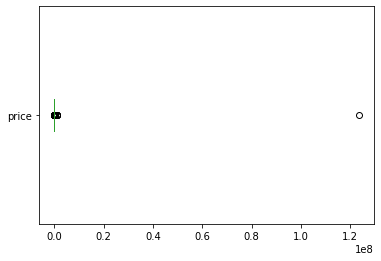

In [ ]:
df.price.plot.box(vert=False)
outliers(df.price)

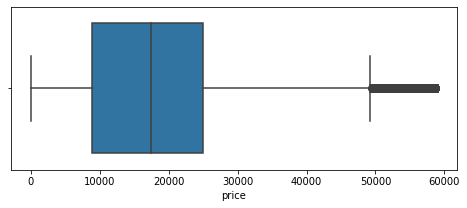

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,count,values
0,IQR,16099.000000
1,Lower Bound,1.000000
2,Q1,8900.000000
3,Q2,17400.000000
4,Q3,24999.000000
5,Upper Bound,49147.500000
6,Count of Outliers,2276.000000
7,Percentage of Outliers,0.032014


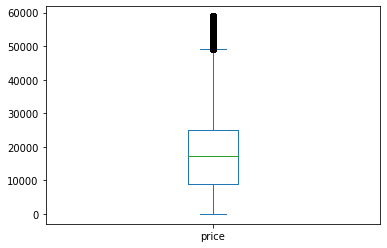

In [ ]:
# f_log=lambda x:(np.log(x)+1 if x>1 else -np.log(-x)-1 if x<-1 else x)
# df['price'] = df['price'].apply(f_log)
df.price = replace_outliers(df.price, replaced_value='mean')
df.price.plot.box();
outliers(df.price)

In [ ]:
df['price'].describe()

count    71094.000000
mean     19161.138842
std      12783.819577
min          1.000000
25%       8900.000000
50%      17400.000000
75%      24999.000000
max      58900.000000
Name: price, dtype: float64

mileage

,count,values
0,IQR,133668.500000
1,Lower Bound,1.000000
2,Q1,29955.250000
3,Q2,95412.000000
4,Q3,163623.750000
5,Upper Bound,364126.500000
6,Count of Outliers,568.000000
7,Percentage of Outliers,0.007989


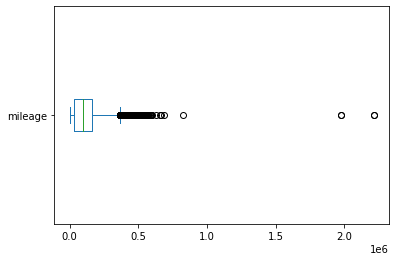

In [ ]:
df.mileage.plot.box(vert=False)
outliers(df.mileage)

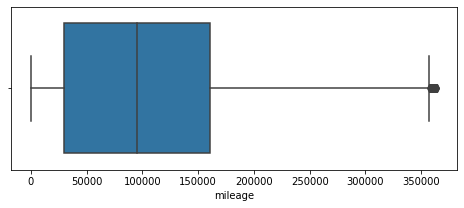

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,count,values
0,IQR,130976.500000
1,Lower Bound,1.000000
2,Q1,29955.250000
3,Q2,95412.000000
4,Q3,160931.750000
5,Upper Bound,357396.500000
6,Count of Outliers,80.000000
7,Percentage of Outliers,0.001125


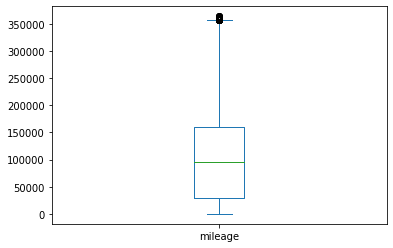

In [ ]:
# f_log=lambda x:(np.log(x)+1 if x>1 else -np.log(-x)-1 if x<-1 else x)
# df['mileage'] = df['mileage'].apply(f_log)
df.mileage = replace_outliers(df.mileage, replaced_value='mean')
df.mileage.plot.box();
outliers(df.mileage)

In [ ]:
df['price'].describe()

count    71094.000000
mean     19161.138842
std      12783.819577
min          1.000000
25%       8900.000000
50%      17400.000000
75%      24999.000000
max      58900.000000
Name: price, dtype: float64

doors

,count,values
0,IQR,1.00000
1,Lower Bound,2.50000
2,Q1,4.00000
3,Q2,5.00000
4,Q3,5.00000
5,Upper Bound,6.00000
6,Count of Outliers,6065.00000
7,Percentage of Outliers,0.08531


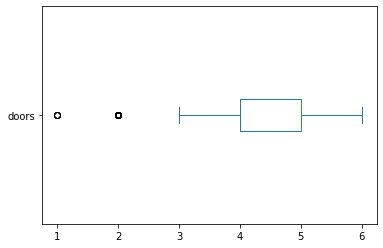

In [ ]:
df.doors.plot.box(vert=False)
outliers(df.doors)

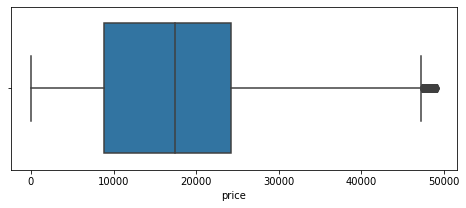

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,count,values
0,IQR,1.00000
1,Lower Bound,2.50000
2,Q1,4.00000
3,Q2,5.00000
4,Q3,5.00000
5,Upper Bound,6.00000
6,Count of Outliers,6065.00000
7,Percentage of Outliers,0.08531


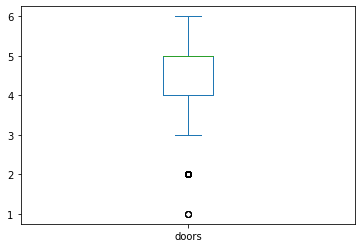

In [ ]:
# f_log=lambda x:(np.log(x)+1 if x>1 else -np.log(-x)-1 if x<-1 else x)
# df['doors'] = df['doors'].apply(f_log)
df.price = replace_outliers(df.price, replaced_value='median')
df.doors.plot.box();
outliers(df.doors)

In [ ]:
df['doors'].describe()

count    71094.000000
mean         4.529398
std          0.916499
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          6.000000
Name: doors, dtype: float64

gears

,count,values
0,IQR,2.000000
1,Lower Bound,2.000000
2,Q1,5.000000
3,Q2,6.000000
4,Q3,7.000000
5,Upper Bound,9.000000
6,Count of Outliers,5372.000000
7,Percentage of Outliers,0.075562


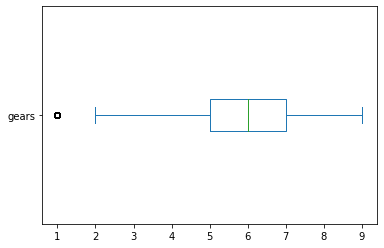

In [ ]:
df.gears.plot.box(vert=False)
outliers(df.gears)

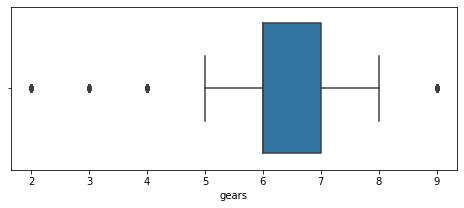

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,count,values
0,IQR,1.000000
1,Lower Bound,4.500000
2,Q1,6.000000
3,Q2,6.000000
4,Q3,7.000000
5,Upper Bound,8.500000
6,Count of Outliers,2401.000000
7,Percentage of Outliers,0.033772


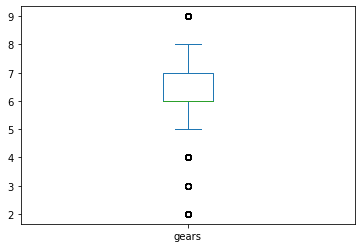

In [ ]:
# f_log=lambda x:(np.log(x)+1 if x>1 else -np.log(-x)-1 if x<-1 else x)
# df['gears'] = df['gears'].apply(f_log)
df.gears = replace_outliers(df.gears, replaced_value='median')
df.gears.plot.box();
outliers(df.gears)

In [ ]:
df['gears'].describe()

count    71094.000000
mean         6.158579
std          1.018793
min          2.000000
25%          6.000000
50%          6.000000
75%          7.000000
max          9.000000
Name: gears, dtype: float64

### fuel_city

,count,values
0,IQR,4.200000
1,Lower Bound,0.100000
2,Q1,5.500000
3,Q2,7.000000
4,Q3,9.700000
5,Upper Bound,16.000000
6,Count of Outliers,935.000000
7,Percentage of Outliers,0.013152


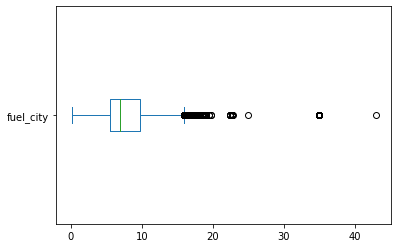

In [ ]:
df.fuel_city.plot.box(vert=False)
outliers(df.fuel_city)

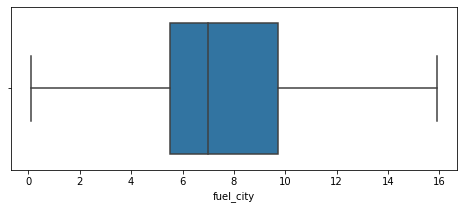

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,count,values
0,IQR,4.2
1,Lower Bound,0.1
2,Q1,5.5
3,Q2,7.0
4,Q3,9.7
5,Upper Bound,15.9
6,Count of Outliers,0.0
7,Percentage of Outliers,0.0


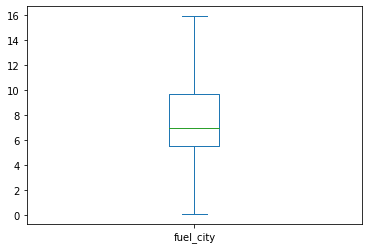

In [ ]:
# f_log=lambda x:(np.log(x)+1 if x>1 else -np.log(-x)-1 if x<-1 else x)
# df['fuel_city'] = df['fuel_city'].apply(f_log)
df.fuel_city = replace_outliers(df.fuel_city, replaced_value='mean')
df.fuel_city.plot.box();
outliers(df.fuel_city)

In [ ]:
df['fuel_city'].describe()

count    71094.000000
mean         7.248368
std          2.694237
min          0.100000
25%          5.500000
50%          7.000000
75%          9.700000
max         15.900000
Name: fuel_city, dtype: float64

fuel_country

,count,values
0,IQR,10.000000
1,Lower Bound,28.000000
2,Q1,43.000000
3,Q2,49.000000
4,Q3,53.000000
5,Upper Bound,68.000000
6,Count of Outliers,9888.000000
7,Percentage of Outliers,0.139083


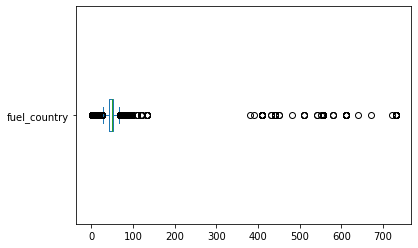

In [ ]:
df.fuel_country.plot.box(vert=False)
outliers(df.fuel_country)

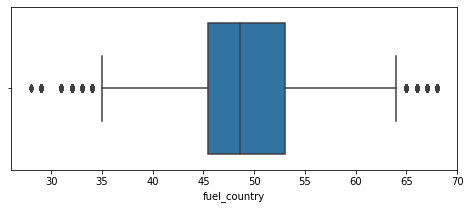

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,count,values
0,IQR,7.524377
1,Lower Bound,34.189057
2,Q1,45.475623
3,Q2,48.589853
4,Q3,53.000000
5,Upper Bound,64.286566
6,Count of Outliers,5253.000000
7,Percentage of Outliers,0.073888


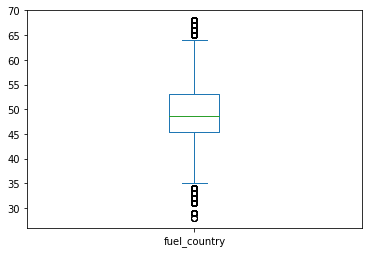

In [ ]:
# f_log=lambda x:(np.log(x)+1 if x>1 else -np.log(-x)-1 if x<-1 else x)
# df['fuel_country'] = df['fuel_country'].apply(f_log)
df.fuel_country = replace_outliers(df.fuel_country, replaced_value='mean')
df.fuel_country.plot.box();
outliers(df.fuel_country)

In [ ]:
df['fuel_country'].describe()

count    71094.000000
mean        48.711714
std          7.201929
min         28.000000
25%         45.475623
50%         48.589853
75%         53.000000
max         68.000000
Name: fuel_country, dtype: float64

fuel_comb

,count,values
0,IQR,2.200000
1,Lower Bound,1.600000
2,Q1,4.900000
3,Q2,5.900000
4,Q3,7.100000
5,Upper Bound,10.400000
6,Count of Outliers,3318.000000
7,Percentage of Outliers,0.046671


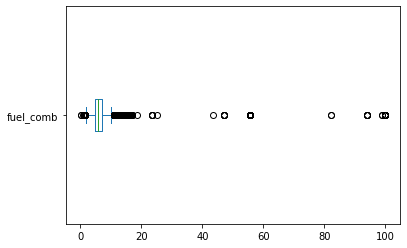

In [ ]:
df.fuel_comb.plot.box(vert=False)
outliers(df.fuel_comb)

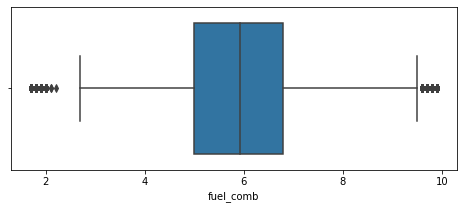

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,count,values
0,IQR,1.800000
1,Lower Bound,2.300000
2,Q1,5.000000
3,Q2,5.927520
4,Q3,6.800000
5,Upper Bound,9.500000
6,Count of Outliers,1078.000000
7,Percentage of Outliers,0.015163


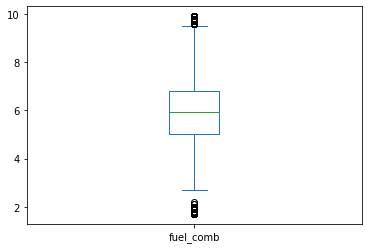

In [ ]:
# f_log=lambda x:(np.log(x)+1 if x>1 else -np.log(-x)-1 if x<-1 else x)
# df['fuel_comb'] = df['fuel_comb'].apply(f_log)
df.fuel_comb = replace_outliers(df.fuel_comb, replaced_value='mean')
df.fuel_comb.plot.box();
outliers(df.fuel_comb)

In [ ]:
df['fuel_comb'].describe()

count    71094.000000
mean         5.975502
std          1.451080
min          1.700000
25%          5.000000
50%          5.927520
75%          6.800000
max          9.900000
Name: fuel_comb, dtype: float64

## Outliers_bs

### Anakod

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def replace_outliers(s, replaced_value='median',whisker=1.5):
  # replace outliers with 'median','mean','mode' or an assigned value.
  indexes = s.dropna().index
  col = s.dropna()
  iqr = (np.quantile(col, 0.75))-(np.quantile(col, 0.25))
  upper_bound = np.quantile(col, 0.75)+(whisker*iqr)
  lower_bound = np.quantile(col, 0.25)-(whisker*iqr)
  upper_bound = upper_bound if upper_bound < col.max() else col.max(),
  lower_bound = lower_bound if lower_bound > col.min() else col.min(),

  if replaced_value=='median':
    col = col.mask(col > upper_bound, col.median())
    col = col.mask(col < lower_bound, col.median())
  elif replaced_value=='mean':
    col = col.mask(col > upper_bound, col.mean())
    col = col.mask(col < lower_bound, col.mean())
  elif replaced_value=='mode':
    col = col.mask(df[col] > upper_bound, col.mode()[0])
    col = col.mask(df[col] < lower_bound, col.mode()[0])
  else:
    col = col.mask(col > upper_bound, replaced_value)
    col= col.mask(col < lower_bound, replaced_value)   

  plt.figure(figsize=(8,3))
  sns.boxplot(x= col)
  plt.show()
  s[indexes]=col
  return s


def outliers(s):
  # summary of the outliers
  s=s.dropna()
  iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
  upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
  lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
  f = []
  for i in s:
    if i > upper_bound:
      f.append(i)
    elif i < lower_bound:
      f.append(i)
  count = int(len(f))
  pros = len(f)/len(s)
  d = {'IQR':iqr,
      'Lower Bound':lower_bound if lower_bound > s.min() else s.min(),
       'Q1':np.quantile(s, 0.25),
       'Q2':np.quantile(s, 0.50),
       'Q3':np.quantile(s, 0.75),
      'Upper Bound':upper_bound if upper_bound < s.max() else s.max(),
      'Count of Outliers': count,'Percentage of Outliers':pros}
  d = pd.DataFrame(d.items(),columns = ['count','values'])
  return(d)

def capping_outliers(s, whisker=1.5):
  # replace outliers with upper_bound and lower_bound values
  indexes = s.dropna().index
  col = s.dropna()
  iqr = (np.quantile(col, 0.75))-(np.quantile(col, 0.25))
  upper_bound = np.quantile(col, 0.75)+(whisker*iqr)
  lower_bound = np.quantile(col, 0.25)-(whisker*iqr)
  upper_bound = upper_bound if upper_bound < col.max() else col.max(),
  lower_bound = lower_bound if lower_bound > col.min() else col.min(),

  col = np.where(col > upper_bound, upper_bound,col)
  col = np.where(col < lower_bound, lower_bound,col)
  plt.figure(figsize=(8,3))
  sns.boxplot(x= col)
  plt.show()
  s[indexes]=col
  return s  

### Numerical Columns

### CO2_EMISSIONS_REPLACE

In [ ]:
# df.co2_emissions.plot.box(vert=False)
# outliers(df.co2_emissions)

In [ ]:
# import numpy as np
# f_log=lambda x:(np.log(x)+1 if x>1 else -np.log(-x)-1 if x<-1 else x)
# df['co2_emissions'] = df['co2_emissions'].apply(f_log)
# df.co2_emissions.plot.box();
# outliers(df.co2_emissions)

In [ ]:
# df.co2_emissions.plot.box(vert=False)

In [ ]:
df.co2_emissions.describe()

count    71094.000000
mean       129.541508
std         59.010572
min          0.000000
25%        108.000000
50%        133.000000
75%        159.000000
max        400.000000
Name: co2_emissions, dtype: float64

In [ ]:
outliers(df.co2_emissions)

,count,values
0,IQR,51.000000
1,Lower Bound,31.500000
2,Q1,108.000000
3,Q2,133.000000
4,Q3,159.000000
5,Upper Bound,235.500000
6,Count of Outliers,8874.000000
7,Percentage of Outliers,0.124821


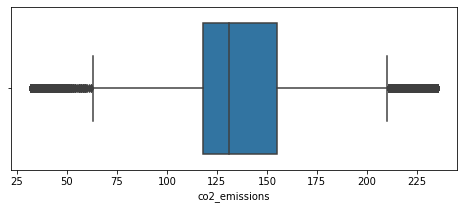

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,count,values
0,IQR,37.000000
1,Lower Bound,62.500000
2,Q1,118.000000
3,Q2,131.000000
4,Q3,155.000000
5,Upper Bound,210.500000
6,Count of Outliers,4271.000000
7,Percentage of Outliers,0.060075


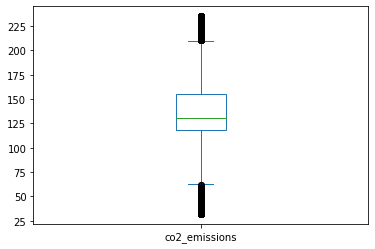

In [ ]:
df.co2_emissions = replace_outliers(df.co2_emissions, replaced_value='mean')
df.co2_emissions.plot.box();
outliers(df.co2_emissions)

In [ ]:
# da3=df_bs.copy()

# outliers(da3.co2_emissions)

In [ ]:
# da3.co2_emissions = replace_outliers(da3.co2_emissions, replaced_value='mean')
# da3.co2_emissions.plot.box();
# outliers(da3.co2_emissions)

In [ ]:
# da4 = df_bs.copy()

# outliers(da4.co2_emissions)

In [ ]:
# da4.co2_emissions = replace_outliers(da4.co2_emissions, replaced_value='mode')
# da4.co2_emissions.plot.box();
# outliers(da4.co2_emissions)

### seats_REPLACE

In [ ]:
# da7=df_bs.copy()

# outliers(da7.seats)

In [ ]:
# da7.seats = replace_outliers(da7.seats, replaced_value='median')
# da7.seats.plot.box();
# outliers(da7.seats)

In [ ]:
# da8=df_bs.copy()

# outliers(da8.seats)

In [ ]:
# da8.seats = replace_outliers(da8.seats, replaced_value='mean')
# da8.seats.plot.box();
# outliers(da8.seats)

In [ ]:
# da9 = df_bs.copy()

# outliers(da9.seats)

In [ ]:
# da9.seats = replace_outliers(da9.seats, replaced_value='mode')
# da9.seats.plot.box();
# outliers(da9.seats)

###  cylinders_REPLACE

In [ ]:
# da12=df_bs.copy()

# outliers(da12.cylinders)

In [ ]:
# da12.cylinders = replace_outliers(da12.cylinders, replaced_value='median')
# da12.cylinders.plot.box();
# outliers(da12.cylinders)

In [ ]:
# da13=df_bs.copy()

# outliers(da13.cylinders)

In [ ]:
# da13.cylinders = replace_outliers(da13.cylinders, replaced_value='mean')
# da13.cylinders.plot.box();
# outliers(da13.cylinders)

In [ ]:
# da14 = df_bs.copy()

# outliers(da14.cylinders)

In [ ]:
# da14.cylinders = replace_outliers(da14.cylinders, replaced_value='mode')
# da14.cylinders.plot.box();
# outliers(da14.cylinders)

## Outliers_sr

### Numerical Columns

### Empty_Weight_kg_REPLACE

,count,values
0,IQR,361.000000
1,Lower Bound,692.500000
2,Q1,1234.000000
3,Q2,1385.000000
4,Q3,1595.000000
5,Upper Bound,2136.500000
6,Count of Outliers,2837.000000
7,Percentage of Outliers,0.039905


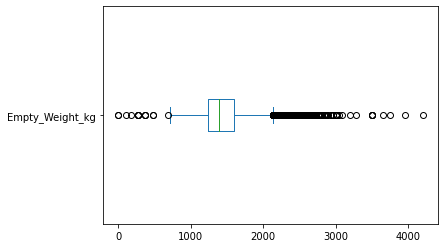

In [ ]:
df.Empty_Weight_kg.plot.box(vert=False)
outliers(df.Empty_Weight_kg)

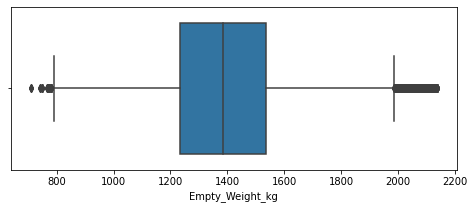

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,count,values
0,IQR,301.000000
1,Lower Bound,782.500000
2,Q1,1234.000000
3,Q2,1385.000000
4,Q3,1535.000000
5,Upper Bound,1986.500000
6,Count of Outliers,2563.000000
7,Percentage of Outliers,0.036051


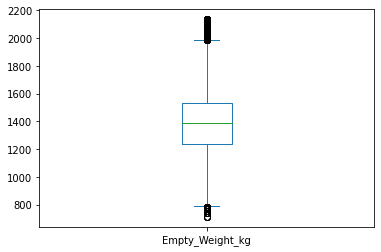

In [ ]:
import numpy as np
# f_log=lambda x:(np.log(x)+1 if x>1 else -np.log(-x)-1 if x<-1 else x)
# df['Empty_Weight_kg'] = df['Empty_Weight_kg'].apply(f_log)
df.Empty_Weight_kg = replace_outliers(df.Empty_Weight_kg, replaced_value='mean')
df.Empty_Weight_kg.plot.box();
outliers(df.Empty_Weight_kg)

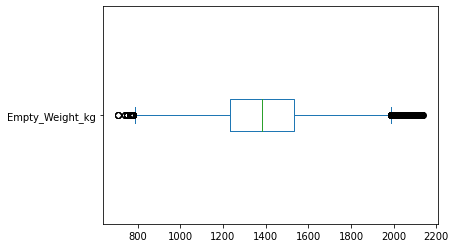

In [ ]:
df.Empty_Weight_kg.plot.box(vert=False)

### First_Registration_Year

*Outliers_Log*
>





In [ ]:
df['First_Registration_Year'].value_counts()

2021    9328
2017    6303
2016    5868
2018    4861
2020    4781
2015    4015
2019    3620
2013    3269
2012    3268
2014    3257
2011    3226
2010    2992
2008    2437
2009    2421
2007    2072
2006    1768
2005    1681
2022    1581
2004    1404
2003    1113
2002     826
2001     563
2000     408
2097       6
2098       6
2099       5
2093       3
2095       2
2094       2
2096       2
2028       1
2025       1
2081       1
2080       1
2076       1
2091       1
Name: First_Registration_Year, dtype: int64

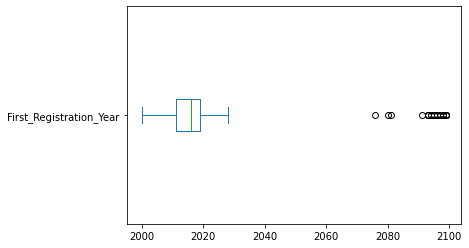

In [ ]:
df.First_Registration_Year.plot.box(vert=False)

In [ ]:
# import numpy as np
# f_log=lambda x:(np.log(x)+1 if x>1 else -np.log(-x)-1 if x<-1 else x)

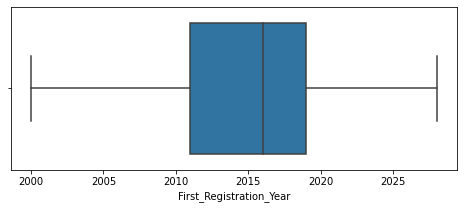

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,count,values
0,IQR,8.0
1,Lower Bound,2000.0
2,Q1,2011.0
3,Q2,2016.0
4,Q3,2019.0
5,Upper Bound,2028.0
6,Count of Outliers,0.0
7,Percentage of Outliers,0.0


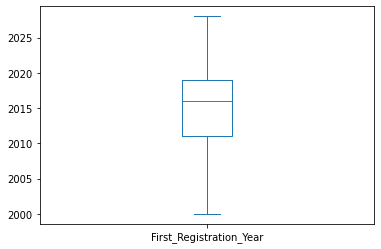

In [ ]:
import numpy as np
df.First_Registration_Year = replace_outliers(df.First_Registration_Year, replaced_value='mean')
df.First_Registration_Year.plot.box();
outliers(df.First_Registration_Year)

### Power_kW

In [ ]:
outliers(df.Power_kW)

,count,values
0,IQR,50.000000
1,Lower Bound,10.000000
2,Q1,85.000000
3,Q2,103.000000
4,Q3,135.000000
5,Upper Bound,210.000000
6,Count of Outliers,4839.000000
7,Percentage of Outliers,0.068065


In [ ]:
df.Power_kW.value_counts()

110    5054
100    2956
88     2942
90     2637
85     2411
       ... 
451       1
259       1
328       1
24        1
10        1
Name: Power_kW, Length: 366, dtype: int64

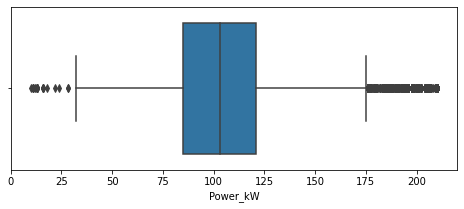

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,count,values
0,IQR,36.000000
1,Lower Bound,31.000000
2,Q1,85.000000
3,Q2,103.000000
4,Q3,121.000000
5,Upper Bound,175.000000
6,Count of Outliers,3324.000000
7,Percentage of Outliers,0.046755


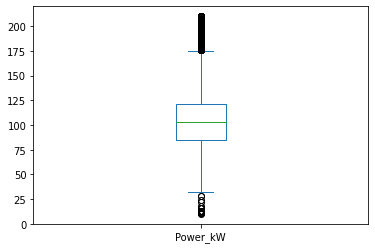

In [ ]:
df.Power_kW = replace_outliers(df.Power_kW, replaced_value='mean')
df.Power_kW.plot.box();
outliers(df.Power_kW)

In [ ]:
df.Power_kW.value_counts()

110.000000    5054
117.414831    4834
100.000000    2956
88.000000     2942
90.000000     2637
              ... 
41.000000        1
35.000000        1
12.000000        1
18.000000        1
10.000000        1
Name: Power_kW, Length: 184, dtype: int64

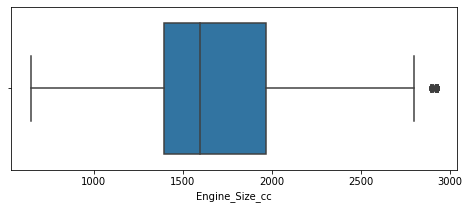

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,count,values
0,IQR,574.000000
1,Lower Bound,647.000000
2,Q1,1395.000000
3,Q2,1598.000000
4,Q3,1969.000000
5,Upper Bound,2830.000000
6,Count of Outliers,112.000000
7,Percentage of Outliers,0.001575


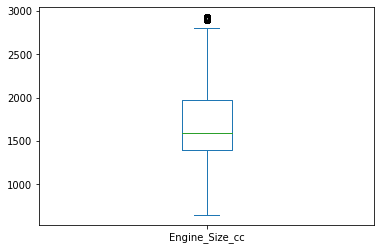

In [ ]:
df.Engine_Size_cc = replace_outliers(df.Engine_Size_cc, replaced_value='mean')
df.Engine_Size_cc.plot.box();
outliers(df.Engine_Size_cc)

In [ ]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,make,model,price,mileage,fuel_type,seller,body_type,type,drivetrain,seats,doors,Warranty_Months,full_service_history,non_smoker_vehicle,Gearbox,Engine_Size_cc,gears,cylinders,Empty_Weight_kg,co2_emissions,Emission_Class_Euro,colour,Paint,Upholstery_Color,upholstery,location,fuel_city,fuel_country,fuel_comb,Power_kW,First_Registration_Year,2_zones,360°_camera,3_zones,4_zones,Air_conditioning,Air_suspension,Armrest,Automatic_climate_control,Auxiliary_heating,Cruise_control,Electric_backseat_adjustment,Electric_tailgate,Electrical_side_mirrors,Electrically_adjustable_seats,Electrically_heated_windshield,Fold_flat_passenger_seat,Heads_up_display,Heated_steering_wheel,Hill_Holder,Keyless_central_door_lock,Leather_seats,Leather_steering_wheel,Light_sensor,Lumbar_support,Massage_seats,Multi_function_steering_wheel,Navigation_system,Panorama_roof,Park_Distance_Control,Parking_assist_system_camera,Parking_assist_system_self_steering,Parking_assist_system_sensors_front,Parking_assist_system_sensors_rear,Power_windows,Rain_sensor,Seat_heating,Seat_ventilation,Sliding_door_left,Sliding_door_right,Split_rear_seats,Start_stop_system,Sunroof,Tinted_windows,Wind_deflector,ABS,Adaptive_Cruise_Control,Adaptive_headlights,Alarm_system,Bi_Xenon_headlights,Blind_spot_monitor,Central_door_lock,Central_door_lock_with_remote_control,Daytime_running_lights,Distance_warning_system,Driver_drowsiness_detection,Driver_side_airbag,Electronic_stability_control,Emergency_brake_assistant,Emergency_system,Fog_lights,Full_LED_headlights,Glare_free_high_beam_headlights,Head_airbag,High_beam_assist,Immobilizer,Isofix,LED_Daytime_Running_Lights,LED_Headlights,Lane_departure_warning_system,Laser_headlights,Night_view_assist,Passenger_side_airbag,Power_steering,Rear_airbag,Side_airbag,Speed_limit_control_system,Tire_pressure_monitoring_system,Traction_control,Traffic_sign_recognition,Xenon_headlights,Android_Auto,Apple_CarPlay,Bluetooth,CD_player,Digital_cockpit,Digital_radio,Hands_free_equipment,Induction_charging_for_smartphones,Integrated_music_streaming,MP3,On_board_computer,Radio,Sound_system,Television,USB,WLAN_/_WiFi_hotspot,make_model
0,0,0,Audi,A3,4450.0,191066.0,Gasoline,Dealer,Compact,Used,Front,5,3,6,1,0,Automatic,1984.0,7.0,4.0,1280.0,110.0,4,Grey,Metallic,Black,Cloth,LOON OP ZAND,4.8,34.0,4.9,110.0,2003.0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Audi A3
1,1,1,Audi,A3,12950.0,94758.0,Gasoline,Dealer,Compact,Used,Front,5,5,6,1,0,Automatic,1395.0,7.0,4.0,1200.0,110.0,6,White,Metallic,Black,Cloth,HEERLEN,4.8,34.0,4.9,92.0,2013.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Audi A3
2,2,2,Audi,A3,12445.0,160883.0,Gasoline,Dealer,Compact,Used,Front,5,5,6,0,0,Automatic,1395.0,7.0,4.0,1200.0,116.0,6,Black,Metallic,Black,Cloth,BREDA,4.8,34.0,5.0,90.0,2013.0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,Audi A3
3,3,3,Audi,A1,12450.0,145102.0,Gasoline,Dealer,Compact,Used,Front,5,5,6,1,1,Automatic,1395.0,7.0,4.0,1015.0,118.0,6,Grey,Metallic,Black,Partleather,BAARLE-NASSAU,4.7,35.0,4.8,92.0,2015.0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,Audi A1
4,4,4,Audi,A1,14945.0,119666.0,Gasoline,Dealer,Compact,Used,Front,4,3,6,1,0,Automatic,1395.0,7.0,4.0,1105.0,111.0,6,Black,Metallic,Black,Partleather,ZUTPHEN,4.7,35.0,4.8,92.0,2015.0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,0,

## Run

In [ ]:
# import numpy as np
# df.replace(np.nan, '', regex=True) #"First_Registration"

# df_bs=df[["Comfort_Convenience", "Safety_Security", "Gearbox","co2_emissions", "body_type", "seller","seats", "type", "cylinders", "full_service_history", "non_smoker_vehicle"]]
# df_bs.head()

In [ ]:
df.isnull().sum()

Unnamed: 0             0
Unnamed: 0.1           0
make                   0
model                  0
price                  0
                      ..
Sound_system           0
Television             0
USB                    0
WLAN_/_WiFi_hotspot    0
make_model             0
Length: 130, dtype: int64

In [ ]:
df.dtypes

Unnamed: 0               int64
Unnamed: 0.1             int64
make                    object
model                   object
price                  float64
                        ...   
Sound_system             int64
Television               int64
USB                      int64
WLAN_/_WiFi_hotspot      int64
make_model              object
Length: 130, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71094 entries, 0 to 71093
Columns: 130 entries, Unnamed: 0 to make_model
dtypes: float64(13), int64(103), object(14)
memory usage: 70.5+ MB


In [ ]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,make,model,price,mileage,fuel_type,seller,body_type,type,drivetrain,seats,doors,Warranty_Months,full_service_history,non_smoker_vehicle,Gearbox,Engine_Size_cc,gears,cylinders,Empty_Weight_kg,co2_emissions,Emission_Class_Euro,colour,Paint,Upholstery_Color,upholstery,location,fuel_city,fuel_country,fuel_comb,Power_kW,First_Registration_Year,2_zones,360°_camera,3_zones,4_zones,Air_conditioning,Air_suspension,Armrest,Automatic_climate_control,Auxiliary_heating,Cruise_control,Electric_backseat_adjustment,Electric_tailgate,Electrical_side_mirrors,Electrically_adjustable_seats,Electrically_heated_windshield,Fold_flat_passenger_seat,Heads_up_display,Heated_steering_wheel,Hill_Holder,Keyless_central_door_lock,Leather_seats,Leather_steering_wheel,Light_sensor,Lumbar_support,Massage_seats,Multi_function_steering_wheel,Navigation_system,Panorama_roof,Park_Distance_Control,Parking_assist_system_camera,Parking_assist_system_self_steering,Parking_assist_system_sensors_front,Parking_assist_system_sensors_rear,Power_windows,Rain_sensor,Seat_heating,Seat_ventilation,Sliding_door_left,Sliding_door_right,Split_rear_seats,Start_stop_system,Sunroof,Tinted_windows,Wind_deflector,ABS,Adaptive_Cruise_Control,Adaptive_headlights,Alarm_system,Bi_Xenon_headlights,Blind_spot_monitor,Central_door_lock,Central_door_lock_with_remote_control,Daytime_running_lights,Distance_warning_system,Driver_drowsiness_detection,Driver_side_airbag,Electronic_stability_control,Emergency_brake_assistant,Emergency_system,Fog_lights,Full_LED_headlights,Glare_free_high_beam_headlights,Head_airbag,High_beam_assist,Immobilizer,Isofix,LED_Daytime_Running_Lights,LED_Headlights,Lane_departure_warning_system,Laser_headlights,Night_view_assist,Passenger_side_airbag,Power_steering,Rear_airbag,Side_airbag,Speed_limit_control_system,Tire_pressure_monitoring_system,Traction_control,Traffic_sign_recognition,Xenon_headlights,Android_Auto,Apple_CarPlay,Bluetooth,CD_player,Digital_cockpit,Digital_radio,Hands_free_equipment,Induction_charging_for_smartphones,Integrated_music_streaming,MP3,On_board_computer,Radio,Sound_system,Television,USB,WLAN_/_WiFi_hotspot,make_model
0,0,0,Audi,A3,4450.0,191066.0,Gasoline,Dealer,Compact,Used,Front,5,3,6,1,0,Automatic,1984.0,7.0,4.0,1280.0,110.000000,4,Grey,Metallic,Black,Cloth,LOON OP ZAND,4.8,34.0,4.9,110.0,2003.0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Audi A3
1,1,1,Audi,A3,12950.0,94758.0,Gasoline,Dealer,Compact,Used,Front,5,5,6,1,0,Automatic,1395.0,7.0,4.0,1200.0,110.000000,6,White,Metallic,Black,Cloth,HEERLEN,4.8,34.0,4.9,92.0,2013.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Audi A3
2,2,2,Audi,A3,12445.0,160883.0,Gasoline,Dealer,Compact,Used,Front,5,5,6,0,0,Automatic,1395.0,7.0,4.0,1200.0,116.000000,6,Black,Metallic,Black,Cloth,BREDA,4.8,34.0,5.0,90.0,2013.0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,Audi A3
3,3,3,Audi,A1,12450.0,145102.0,Gasoline,Dealer,Compact,Used,Front,5,5,6,1,1,Automatic,1395.0,7.0,4.0,1015.0,118.000000,6,Grey,Metallic,Black,Partleather,BAARLE-NASSAU,4.7,35.0,4.8,92.0,2015.0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,Audi A1
4,4,4,Audi,A1,14945.0,119666.0,Gasoline,Dealer,Compact,Used,Front,4,3,6,1,0,Automatic,1395.0,7.0,4.0,1105.0,111.000000,6,Black,Metallic,Black,Partleather,ZUTPHEN,4.7,35.0,4.8,92.0,2015.0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1

In [ ]:
df.to_csv('autoscout24.csv')

## dummies

In [ ]:
# autoscout24["make"] = autoscout24["make"].astype("category")
# autoscout24 = pd.get_dummies(autoscout24, columns=["make"])

# autoscout24["model"] = autoscout24["model"].astype("category")
# autoscout24 = pd.get_dummies(autoscout24, columns=["model"])

# autoscout24["fuel_type"] = autoscout24["fuel_type"].astype("category")
# autoscout24 = pd.get_dummies(autoscout24, columns=["fuel_type"])

# autoscout24["seller"] = autoscout24["seller"].astype("category")
# autoscout24 = pd.get_dummies(autoscout24, columns=["seller"])

# autoscout24["body_type"] = autoscout24["body_type"].astype("category")
# autoscout24 = pd.get_dummies(autoscout24, columns=["body_type"])

# autoscout24["type"] = autoscout24["type"].astype("category")
# autoscout24 = pd.get_dummies(autoscout24, columns=["type"])

# autoscout24["drivetrain"] = autoscout24["drivetrain"].astype("category")
# autoscout24 = pd.get_dummies(autoscout24, columns=["drivetrain"])

# autoscout24["Gearbox"] = autoscout24["Gearbox"].astype("category")
# autoscout24 = pd.get_dummies(autoscout24, columns=["Gearbox"])

# autoscout24["colour"] = autoscout24["colour"].astype("category")
# autoscout24 = pd.get_dummies(autoscout24, columns=["colour"])

# autoscout24["Paint"] = autoscout24["Paint"].astype("category")
# autoscout24 = pd.get_dummies(autoscout24, columns=["Paint"])

# autoscout24["Upholstery_Color"] = autoscout24["Upholstery_Color"].astype("category")
# autoscout24 = pd.get_dummies(autoscout24, columns=["Upholstery_Color"])

# autoscout24["upholstery"] = autoscout24["upholstery"].astype("category")
# autoscout24 = pd.get_dummies(autoscout24, columns=["upholstery"])

# autoscout24 = autoscout24.drop('Comfort_Convenience', axis=1)
# autoscout24 = autoscout24.drop('Entertainment_Media', axis=1)
# autoscout24 = autoscout24.drop('Safety_Security', axis=1)
# autoscout24 = autoscout24.drop('location', axis=1)
# autoscout24 = autoscout24.drop('general_inspection', axis=1)
autoscout24 = autoscout24.drop('make_model', axis=1)


autoscout24.head()

In [ ]:
autoscout24.info(verbose=True)

In [ ]:
autoscout24.isnull().values.any()

## OrdinalEncore(obj_sayisal_yapma)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ord_enc = OrdinalEncoder()
autoscout24["make_model"] = ord_enc.fit_transform(autoscout24[["make_model"]])

In [ ]:
autoscout24["make_model"]=autoscout24.make_model.astype('int64')

In [ ]:
ord_enc = OrdinalEncoder()
autoscout24["fuel_type"] = ord_enc.fit_transform(autoscout24[["fuel_type"]])


In [ ]:
autoscout24["fuel_type"]=autoscout24.fuel_type.astype('int64')

In [ ]:
ord_enc = OrdinalEncoder()
autoscout24["drivetrain"] = ord_enc.fit_transform(autoscout24[["drivetrain"]])

In [ ]:
autoscout24["drivetrain"]=autoscout24.drivetrain.astype('int64')

In [ ]:
ord_enc = OrdinalEncoder()
autoscout24["type"] = ord_enc.fit_transform(autoscout24[["type"]])

In [ ]:
autoscout24["type"]=autoscout24.type.astype('int64')

In [ ]:
ord_enc = OrdinalEncoder()
autoscout24["seller"] = ord_enc.fit_transform(autoscout24[["seller"]])

In [ ]:
autoscout24["seller"]=autoscout24.seller.astype('int64')

In [ ]:
ord_enc = OrdinalEncoder()
autoscout24["body_type"] = ord_enc.fit_transform(autoscout24[["body_type"]])

In [ ]:
autoscout24["body_type"]=autoscout24.body_type.astype('int64')

In [ ]:
ord_enc = OrdinalEncoder()
autoscout24["location"] = ord_enc.fit_transform(autoscout24[["location"]])

In [ ]:
autoscout24["location"]=autoscout24.location.astype('int64')

In [ ]:
ord_enc = OrdinalEncoder()
autoscout24["colour"] = ord_enc.fit_transform(autoscout24[["colour"]])

In [ ]:
autoscout24["colour"]=autoscout24.colour.astype('int64')

In [ ]:
ord_enc = OrdinalEncoder()
autoscout24["Paint"] = ord_enc.fit_transform(autoscout24[["Paint"]])

In [ ]:
autoscout24["Paint"]=autoscout24.Paint.astype('int64')

In [ ]:
ord_enc = OrdinalEncoder()
autoscout24["Upholstery_Color"] = ord_enc.fit_transform(autoscout24[["Upholstery_Color"]])

In [ ]:
autoscout24["Upholstery_Color"]=autoscout24.Upholstery_Color.astype('int64')

In [ ]:
ord_enc = OrdinalEncoder()
autoscout24["upholstery"] = ord_enc.fit_transform(autoscout24[["upholstery"]])

In [ ]:
autoscout24["upholstery"]=autoscout24.upholstery.astype('int64')

In [ ]:
ord_enc = OrdinalEncoder()
autoscout24["Gearbox"] = ord_enc.fit_transform(autoscout24[["Gearbox"]])

In [ ]:
autoscout24["Gearbox"]=autoscout24.Gearbox.astype('int64')

In [ ]:
autoscout24 = autoscout24.drop('make', axis=1)
autoscout24 = autoscout24.drop('model', axis=1)
# autoscout24 = autoscout24.drop('Comfort_Convenience', axis=1)
# autoscout24 = autoscout24.drop('Entertainment_Media', axis=1)
# autoscout24 = autoscout24.drop('Safety_Security', axis=1)
# autoscout24 = autoscout24.drop('co2_emissions_(g_km)', axis=1)


## ML e gecis

In [ ]:
autoscout24.head()

In [ ]:
autoscout24.shape

In [ ]:
autoscout24.to_csv('For_ML.csv', index=False)

# ML

# giris

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df=pd.read_csv('/content/drive/My Drive/pycoders/For_ML.csv')
# pd.set_option("display.max_columns", None)
df.head(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,price,mileage,fuel_type,seller,body_type,type,drivetrain,...,Induction_charging_for_smartphones,Integrated_music_streaming,MP3,On_board_computer,Radio,Sound_system,Television,USB,WLAN_/_WiFi_hotspot,make_model
0,0,0,0,4450.0,191066.0,6,0,0,1,1,...,0,0,0,0,1,0,0,0,0,2
1,1,1,1,12950.0,94758.0,6,0,0,1,1,...,0,0,0,0,1,0,0,0,0,2
2,2,2,2,12445.0,160883.0,6,0,0,1,1,...,0,0,1,1,1,0,0,0,0,2
3,3,3,3,12450.0,145102.0,6,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0
4,4,4,4,14945.0,119666.0,6,0,0,1,1,...,0,0,1,1,1,0,0,0,0,0
5,5,5,5,14950.0,187999.0,6,0,0,1,1,...,0,0,0,0,1,0,0,0,0,2
6,6,6,6,24945.0,96383.0,6,0,0,1,1,...,0,0,0,1,0,0,0,0,0,2
7,7,7,7,24900.0,55815.0,6,0,0,1,1,...,0,0,0,1,1,0,0,0,0,2
8,8,8,8,24750.0,47536.0,6,0,0,1,1,...,0,0,0,1,1,0,0,0,0,2
9,9,9,9,15945.0,94530.0,6,0,0,1,1,...,0,0,1,1,1,0,0,0,0,0


In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
df['colour'].isnull().sum()

0

In [ ]:
df.isnull().values.any()

False

In [ ]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Unnamed: 0.1', axis=1)
df = df.drop('Unnamed: 0.1.1', axis=1)

In [ ]:
df.head()

,price,mileage,fuel_type,seller,body_type,type,drivetrain,seats,doors,Warranty_Months,full_service_history,non_smoker_vehicle,Gearbox,Engine_Size_cc,gears,cylinders,Empty_Weight_kg,co2_emissions,Emission_Class_Euro,colour,Paint,Upholstery_Color,upholstery,location,fuel_city,fuel_country,fuel_comb,Power_kW,First_Registration_Year,2_zones,360°_camera,3_zones,4_zones,Air_conditioning,Air_suspension,Armrest,Automatic_climate_control,Auxiliary_heating,Cruise_control,Electric_backseat_adjustment,Electric_tailgate,Electrical_side_mirrors,Electrically_adjustable_seats,Electrically_heated_windshield,Fold_flat_passenger_seat,Heads_up_display,Heated_steering_wheel,Hill_Holder,Keyless_central_door_lock,Leather_seats,Leather_steering_wheel,Light_sensor,Lumbar_support,Massage_seats,Multi_function_steering_wheel,Navigation_system,Panorama_roof,Park_Distance_Control,Parking_assist_system_camera,Parking_assist_system_self_steering,Parking_assist_system_sensors_front,Parking_assist_system_sensors_rear,Power_windows,Rain_sensor,Seat_heating,Seat_ventilation,Sliding_door_left,Sliding_door_right,Split_rear_seats,Start_stop_system,Sunroof,Tinted_windows,Wind_deflector,ABS,Adaptive_Cruise_Control,Adaptive_headlights,Alarm_system,Bi_Xenon_headlights,Blind_spot_monitor,Central_door_lock,Central_door_lock_with_remote_control,Daytime_running_lights,Distance_warning_system,Driver_drowsiness_detection,Driver_side_airbag,Electronic_stability_control,Emergency_brake_assistant,Emergency_system,Fog_lights,Full_LED_headlights,Glare_free_high_beam_headlights,Head_airbag,High_beam_assist,Immobilizer,Isofix,LED_Daytime_Running_Lights,LED_Headlights,Lane_departure_warning_system,Laser_headlights,Night_view_assist,Passenger_side_airbag,Power_steering,Rear_airbag,Side_airbag,Speed_limit_control_system,Tire_pressure_monitoring_system,Traction_control,Traffic_sign_recognition,Xenon_headlights,Android_Auto,Apple_CarPlay,Bluetooth,CD_player,Digital_cockpit,Digital_radio,Hands_free_equipment,Induction_charging_for_smartphones,Integrated_music_streaming,MP3,On_board_computer,Radio,Sound_system,Television,USB,WLAN_/_WiFi_hotspot,make_model
0,4450.0,191066.0,6,0,0,1,1,5,3,6,1,0,0,1984.0,7.0,4.0,1280.0,110.0,4,7,0,1,0,1089,4.8,34.0,4.9,110.0,2003.0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2
1,12950.0,94758.0,6,0,0,1,1,5,5,6,1,0,0,1395.0,7.0,4.0,1200.0,110.0,6,12,0,1,0,757,4.8,34.0,4.9,92.0,2013.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2
2,12445.0,160883.0,6,0,0,1,1,5,5,6,0,0,0,1395.0,7.0,4.0,1200.0,116.0,6,1,0,1,0,226,4.8,34.0,5.0,90.0,2013.0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,2
3,12450.0,145102.0,6,0,0,1,1,5,5,6,1,1,0,1395.0,7.0,4.0,1015.0,118.0,6,7,0,1,3,150,4.7,35.0,4.8,92.0,2015.0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,14945.0,119666.0,6,0,0,1,1,4,3,6,1,0,0,1395.0,7.0,4.0,1105.0,111.0,6,1,0,1,3,2172,4.7,35.0,4.8,92.0,2015.0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0


In [ ]:
import pandas as pd
from IPython.display import display

pd.options.display.max_columns = None
display(df)

#


,price,mileage,fuel_type,seller,body_type,type,drivetrain,seats,doors,Warranty_Months,full_service_history,non_smoker_vehicle,Gearbox,Engine_Size_cc,gears,cylinders,Empty_Weight_kg,co2_emissions,Emission_Class_Euro,colour,Paint,Upholstery_Color,upholstery,location,fuel_city,fuel_country,fuel_comb,Power_kW,First_Registration_Year,2_zones,360°_camera,3_zones,4_zones,Air_conditioning,Air_suspension,Armrest,Automatic_climate_control,Auxiliary_heating,Cruise_control,Electric_backseat_adjustment,Electric_tailgate,Electrical_side_mirrors,Electrically_adjustable_seats,Electrically_heated_windshield,Fold_flat_passenger_seat,Heads_up_display,Heated_steering_wheel,Hill_Holder,Keyless_central_door_lock,Leather_seats,Leather_steering_wheel,Light_sensor,Lumbar_support,Massage_seats,Multi_function_steering_wheel,Navigation_system,Panorama_roof,Park_Distance_Control,Parking_assist_system_camera,Parking_assist_system_self_steering,Parking_assist_system_sensors_front,Parking_assist_system_sensors_rear,Power_windows,Rain_sensor,Seat_heating,Seat_ventilation,Sliding_door_left,Sliding_door_right,Split_rear_seats,Start_stop_system,Sunroof,Tinted_windows,Wind_deflector,ABS,Adaptive_Cruise_Control,Adaptive_headlights,Alarm_system,Bi_Xenon_headlights,Blind_spot_monitor,Central_door_lock,Central_door_lock_with_remote_control,Daytime_running_lights,Distance_warning_system,Driver_drowsiness_detection,Driver_side_airbag,Electronic_stability_control,Emergency_brake_assistant,Emergency_system,Fog_lights,Full_LED_headlights,Glare_free_high_beam_headlights,Head_airbag,High_beam_assist,Immobilizer,Isofix,LED_Daytime_Running_Lights,LED_Headlights,Lane_departure_warning_system,Laser_headlights,Night_view_assist,Passenger_side_airbag,Power_steering,Rear_airbag,Side_airbag,Speed_limit_control_system,Tire_pressure_monitoring_system,Traction_control,Traffic_sign_recognition,Xenon_headlights,Android_Auto,Apple_CarPlay,Bluetooth,CD_player,Digital_cockpit,Digital_radio,Hands_free_equipment,Induction_charging_for_smartphones,Integrated_music_streaming,MP3,On_board_computer,Radio,Sound_system,Television,USB,WLAN_/_WiFi_hotspot,make_model
0,4450.0,191066.000000,6,0,0,1,1,5,3,6,1,0,0,1984.0,7.0,4.0,1280.0,110.0,4,7,0,1,0,1089,4.8,34.000000,4.90000,110.0,2003.0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2
1,12950.0,94758.000000,6,0,0,1,1,5,5,6,1,0,0,1395.0,7.0,4.0,1200.0,110.0,6,12,0,1,0,757,4.8,34.000000,4.90000,92.0,2013.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2
2,12445.0,160883.000000,6,0,0,1,1,5,5,6,0,0,0,1395.0,7.0,4.0,1200.0,116.0,6,1,0,1,0,226,4.8,34.000000,5.00000,90.0,2013.0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,2
3,12450.0,145102.000000,6,0,0,1,1,5,5,6,1,1,0,1395.0,7.0,4.0,1015.0,118.0,6,7,0,1,3,150,4.7,35.000000,4.80000,92.0,2015.0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,14945.0,119666.000000,6,0,0,1,1,4,3,6,1,0,0,1395.0,7.0,4.0,1105.0,111.0,6,1,0,1,3,2172,4.7,35.000000,4.80000,92.0,2015.0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
 pd.set_option('max_columns', None)
 df.columns

Index(['price', 'mileage', 'fuel_type', 'seller', 'body_type', 'type',
       'drivetrain', 'seats', 'doors', 'Warranty_Months',
       ...
       'Induction_charging_for_smartphones', 'Integrated_music_streaming',
       'MP3', 'On_board_computer', 'Radio', 'Sound_system', 'Television',
       'USB', 'WLAN_/_WiFi_hotspot', 'make_model'],
      dtype='object', length=126)

# Models

## imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedKFold, cross_validate

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale, MinMaxScaler, RobustScaler, LabelEncoder

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeRegressor
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import make_classification
import xlrd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import joblib



import lightgbm as lgb

from statsmodels.stats.outliers_influence import variance_inflation_factor


## LinearRegression

In [ ]:
y = np.array(df['price'])
X = np.array(df.drop('price', axis =1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2) 

In [ ]:
linear = LinearRegression()

In [ ]:
linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear.score(X_test, y_test)

0.7425961528120422

In [ ]:
linear.score(X_train, y_train)

0.7472882776031697

In [ ]:
rmse= np.sqrt(mean_squared_error(y_test, linear.predict(X_test)))
rmse

5624.06362430076

## DecisionTreeRegressor

In [ ]:
#Selecting features and getting their values as X and Y
y = np.array(df['price'])
X = np.array(df.drop('price', axis =1))

In [ ]:
model = DecisionTreeRegressor(random_state=42, max_depth=8)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [ ]:
model.score(X_train, y_train)

0.8165531234409915

In [ ]:
model.score(X_test, y_test)

0.7992818755868852

In [ ]:
rmse= np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse

4966.334910987734

## Lasso Regression

In [ ]:
X = df.drop(columns = 'price')
y = df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
lasso_model = Lasso().fit(X_train, y_train)

In [ ]:
lasso = lasso_model.score(X_test, y_test)
lasso

0.7451505393281694

In [ ]:
lasso_sqrt = np.sqrt(mean_squared_error(y_test, lasso_model.predict(X_test)))
lasso_sqrt

5620.514524590837

## ridge_model

In [ ]:
# define model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:

ridge = r2_score(y_test, ridge_model.predict(X_test))
ridge_sqrt = np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test)))

In [ ]:
print('R2 SCORE=' , r2_score(y_test, ridge_model.predict(X_test)))
print('RMSE SCORE=' , np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test))))

R2 SCORE= 0.7450211573640935
RMSE SCORE= 5621.9410548539545


## ElasticNet

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model_ElasticNet= ElasticNet(random_state=0)
model_ElasticNet.fit(X_train,y_train)

ElasticNet(random_state=0)

In [ ]:
y_pred = model_ElasticNet.predict(X_test)

In [ ]:
elastic = r2_score(y_test, y_pred)
elastic_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print('R2_Score :',model_ElasticNet.score(X_test, y_test))

print('RMSE Score :',np.sqrt(mean_squared_error(y_test, model_ElasticNet.predict(X_test))))

R2_Score : 0.7181312359659805
RMSE Score : 5910.955510750438


## LGBM Regressor

In [ ]:
X = df.drop(columns = 'price')
y = df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000
}
gbm = lgb.LGBMRegressor(**hyper_params)
gbm.fit(X_train, y_train,eval_set=[(X_test, y_test)],eval_metric='l1',early_stopping_rounds=1000)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Streaming output truncated to the last 5000 lines.
[18024]	valid_0's l1: 1746.03	valid_0's l2: 1.08673e+07
[18025]	valid_0's l1: 1746.03	valid_0's l2: 1.08673e+07
[18026]	valid_0's l1: 1746.03	valid_0's l2: 1.08673e+07
[18027]	valid_0's l1: 1746.02	valid_0's l2: 1.08673e+07
[18028]	valid_0's l1: 1746.02	valid_0's l2: 1.08673e+07
[18029]	valid_0's l1: 1746.01	valid_0's l2: 1.08673e+07
[18030]	valid_0's l1: 1746.01	valid_0's l2: 1.08673e+07
[18031]	valid_0's l1: 1746	valid_0's l2: 1.08673e+07
[18032]	valid_0's l1: 1746.01	valid_0's l2: 1.08674e+07
[18033]	valid_0's l1: 1746.01	valid_0's l2: 1.08674e+07
[18034]	valid_0's l1: 1746.01	valid_0's l2: 1.08675e+07
[18035]	valid_0's l1: 1746.01	valid_0's l2: 1.08675e+07
[18036]	valid_0's l1: 1746.01	valid_0's l2: 1.08675e+07
[18037]	valid_0's l1: 1746.01	valid_0's l2: 1.08675e+07
[18038]	valid_0's l1: 1746.02	valid_0's l2: 1.08675e+07
[18039]	valid_0's l1: 1746.02	valid_0's l2: 1.08675e+07
[18040]	valid_0's l1: 1746.02	valid_0's l2: 1.08675e+07


LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8,
              metric=['l1', 'l2'], num_iterations=100000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [ ]:
joblib.dump(gbm,'/content/drive/MyDrive/pycoders/LGBM regressor.sav')

['/content/drive/MyDrive/pycoders/LGBM regressor.sav']

In [ ]:
gbm = joblib.load('/content/drive/MyDrive/pycoders/LGBM regressor.sav')

In [ ]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

In [ ]:

gbmm = r2_score(y_test, y_pred)
gbm_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print('R2 SCORE=' , gbmm)
print('RMSE SCORE=' , gbm_sqrt)

R2 SCORE= 0.9126881530591973
RMSE SCORE= 3289.8098954964007


## random forest

In [ ]:
y = np.array(df['price'])
X = np.array(df.drop('price', axis =1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 100)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
rf.score(X_test, y_test)


0.9010057175469312

In [ ]:
RMSE_rf= np.sqrt(mean_squared_error(y_test, y_pred))
RMSE_rf

3504.471145710864

## result

In [ ]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
linear = r2_score(y_test, y_pred)
linear_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
decisiontree = DecisionTreeRegressor()
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)
decisiontree = r2_score(y_test, y_pred)
decisiontree_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
lasso = r2_score(y_test, y_pred)
lasso_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
ridge = r2_score(y_test, y_pred)
ridge_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
y_pred = elasticnet.predict(X_test)
elasticnet = r2_score(y_test, y_pred)
elasticnet_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
lgbm = lgb.LGBMRegressor()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
lgbm = r2_score(y_test, y_pred)
lgbm_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
random = RandomForestRegressor(n_estimators=50)
random.fit(X_train, y_train)
y_pred = random.predict(X_test)
random = r2_score(y_test, y_pred)
random_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
dict = {'Model Name':['LinearRegression','DecisionTreeRegressor','Lasso','Ridge','ElasticNet','LGBMRegressor','RandomForestRegressor'],'R2 Score':[linear, decisiontree, lasso, ridge, elasticnet, lgbm, random],'Sqrt':[linear_sqrt, decisiontree_sqrt, lasso_sqrt, ridge_sqrt, elasticnet_sqrt, lgbm_sqrt, random_sqrt]}


In [ ]:
scores = pd.DataFrame(dict)
scores  = scores.sort_values('R2 Score')
scores

,Model Name,R2 Score,Sqrt
4,ElasticNet,0.717382,5921.307445
2,Lasso,0.746997,5602.479932
3,Ridge,0.747070,5601.670557
0,LinearRegression,0.747073,5601.635625
1,DecisionTreeRegressor,0.808438,4874.977349
5,LGBMRegressor,0.879364,3868.622385
6,RandomForestRegressor,0.898571,3547.307141


## matplotlib

Text(0.5, 1.0, 'R2 Scores')

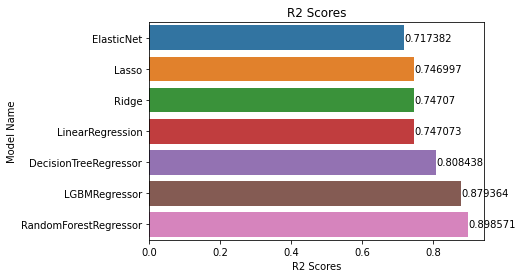

In [ ]:
g = sns.barplot(x = "R2 Score",y = "Model Name", data = scores)
g.bar_label(g.containers[0])
g.set_xlabel("R2 Scores")
g.set_title("R2 Scores")

In [ ]:
# pip install matplotlib --upgrade

Text(0.5, 1.0, 'RMSE Scores')

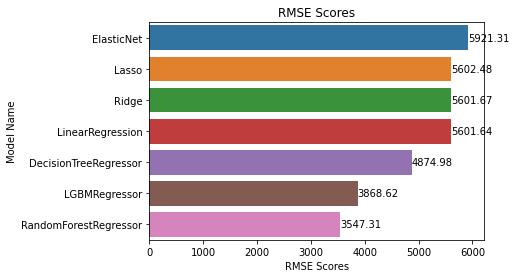

In [ ]:
g = sns.barplot(x = "Sqrt",y =  "Model Name", data = scores)
g.bar_label(g.containers[0])
g.set_xlabel("RMSE Scores")
g.set_title("RMSE Scores")

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 30]
Importance = pd.DataFrame({"Importance": gbm.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

AttributeError: ignored

In [ ]:
gbm

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8,
              metric=['l1', 'l2'], num_iterations=100000, num_leaves=128,
              objective='regression', task='train', verbose=0)

## Variance_Inflation_Factor

In [ ]:
X = df.drop(columns = 'price')
y = df['price']

In [ ]:
def vif_(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
VIF=vif_(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [ ]:

vifvalue = pd.DataFrame()
vifvalue["variables"] = X.columns
vifvalue["vifactor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [ ]:
vifvalue

,variables,vifactor
0,mileage,6.656264
1,fuel_type,10.425526
2,seller,2.668843
3,body_type,3.862417
4,type,50.492855
...,...,...
120,Sound_system,1.646020
121,Television,1.092803
122,USB,1.874475
123,WLAN_/_WiFi_hotspot,1.443683


In [ ]:
vif_list=(vifvalue.loc[vifvalue['vifactor'] >= 5] )
print (vif_list)

                                 variables    vifactor
0                                  mileage    6.656264
1                                fuel_type   10.425526
4                                     type   50.492855
5                               drivetrain    5.901424
6                                    seats   64.407927
7                                    doors   47.047034
12                          Engine_Size_cc   44.258649
13                                   gears   73.350153
14                               cylinders   22.938379
15                         Empty_Weight_kg   96.600415
16                           co2_emissions   36.013851
17                     Emission_Class_Euro   72.369441
23                               fuel_city   11.521893
24                            fuel_country   70.672662
25                               fuel_comb   47.002315
26                                Power_kW   30.180228
27                 First_Registration_Year  439.574298
32        

In [ ]:
#according to high importance and vif we drop some columns with dependent variable
X=df.drop(['First_Registration_Year','fuel_city','fuel_country','price'], axis=1)
y = df['price']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
# y = (y -y.mean())/y.std()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state =42)

## LGBM last version

In [ ]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000
}
gbm = lgb.LGBMRegressor(**hyper_params)

In [ ]:
gbm.fit(X_train, y_train,eval_set=[(X_test, y_test)],eval_metric='l1',early_stopping_rounds=1000)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Streaming output truncated to the last 5000 lines.
[23603]	valid_0's l1: 1984.41	valid_0's l2: 1.24404e+07
[23604]	valid_0's l1: 1984.42	valid_0's l2: 1.24404e+07
[23605]	valid_0's l1: 1984.42	valid_0's l2: 1.24405e+07
[23606]	valid_0's l1: 1984.42	valid_0's l2: 1.24405e+07
[23607]	valid_0's l1: 1984.42	valid_0's l2: 1.24406e+07
[23608]	valid_0's l1: 1984.42	valid_0's l2: 1.24406e+07
[23609]	valid_0's l1: 1984.43	valid_0's l2: 1.24406e+07
[23610]	valid_0's l1: 1984.42	valid_0's l2: 1.24406e+07
[23611]	valid_0's l1: 1984.43	valid_0's l2: 1.24406e+07
[23612]	valid_0's l1: 1984.44	valid_0's l2: 1.24407e+07
[23613]	valid_0's l1: 1984.45	valid_0's l2: 1.24408e+07
[23614]	valid_0's l1: 1984.46	valid_0's l2: 1.24409e+07
[23615]	valid_0's l1: 1984.45	valid_0's l2: 1.24409e+07
[23616]	valid_0's l1: 1984.45	valid_0's l2: 1.24409e+07
[23617]	valid_0's l1: 1984.45	valid_0's l2: 1.2441e+07
[23618]	valid_0's l1: 1984.46	valid_0's l2: 1.2441e+07
[23619]	valid_0's l1: 1984.46	valid_0's l2: 1.2441e+07


LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8,
              metric=['l1', 'l2'], num_iterations=100000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [ ]:
joblib.dump(gbm,'/content/drive/MyDrive/pycoders/LGBMregressor.sav')

['/content/drive/MyDrive/pycoders/LGBMregressor.sav']

In [ ]:
gbm = joblib.load('/content/drive/MyDrive/pycoders/LGBMregressor.sav')

In [ ]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

In [ ]:
gbmm = r2_score(y_test, y_pred)
gbm_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print('R2 SCORE=' , gbmm)
print('RMSE SCORE=' , gbm_sqrt)

R2 SCORE= 0.8999108439438099
RMSE SCORE= 3522.311240454967


#  ML e GIRIS

## giris

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df=pd.read_csv('/content/drive/My Drive/pycoders/For_ML.csv')
# pd.set_option("display.max_columns", None)
df.head(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,price,mileage,fuel_type,seller,body_type,type,drivetrain,...,Induction_charging_for_smartphones,Integrated_music_streaming,MP3,On_board_computer,Radio,Sound_system,Television,USB,WLAN_/_WiFi_hotspot,make_model
0,0,0,0,4450.0,191066.0,6,0,0,1,1,...,0,0,0,0,1,0,0,0,0,2
1,1,1,1,12950.0,94758.0,6,0,0,1,1,...,0,0,0,0,1,0,0,0,0,2
2,2,2,2,12445.0,160883.0,6,0,0,1,1,...,0,0,1,1,1,0,0,0,0,2
3,3,3,3,12450.0,145102.0,6,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0
4,4,4,4,14945.0,119666.0,6,0,0,1,1,...,0,0,1,1,1,0,0,0,0,0
5,5,5,5,14950.0,187999.0,6,0,0,1,1,...,0,0,0,0,1,0,0,0,0,2
6,6,6,6,24945.0,96383.0,6,0,0,1,1,...,0,0,0,1,0,0,0,0,0,2
7,7,7,7,24900.0,55815.0,6,0,0,1,1,...,0,0,0,1,1,0,0,0,0,2
8,8,8,8,24750.0,47536.0,6,0,0,1,1,...,0,0,0,1,1,0,0,0,0,2
9,9,9,9,15945.0,94530.0,6,0,0,1,1,...,0,0,1,1,1,0,0,0,0,0


In [ ]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Unnamed: 0.1', axis=1)
df = df.drop('Unnamed: 0.1.1', axis=1)

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
df['colour'].isnull().sum()

0

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.head()

,price,mileage,fuel_type,seller,body_type,type,drivetrain,seats,doors,Warranty_Months,full_service_history,non_smoker_vehicle,Gearbox,Engine_Size_cc,gears,cylinders,Empty_Weight_kg,co2_emissions,Emission_Class_Euro,colour,Paint,Upholstery_Color,upholstery,location,fuel_city,fuel_country,fuel_comb,Power_kW,First_Registration_Year,2_zones,360°_camera,3_zones,4_zones,Air_conditioning,Air_suspension,Armrest,Automatic_climate_control,Auxiliary_heating,Cruise_control,Electric_backseat_adjustment,Electric_tailgate,Electrical_side_mirrors,Electrically_adjustable_seats,Electrically_heated_windshield,Fold_flat_passenger_seat,Heads_up_display,Heated_steering_wheel,Hill_Holder,Keyless_central_door_lock,Leather_seats,Leather_steering_wheel,Light_sensor,Lumbar_support,Massage_seats,Multi_function_steering_wheel,Navigation_system,Panorama_roof,Park_Distance_Control,Parking_assist_system_camera,Parking_assist_system_self_steering,Parking_assist_system_sensors_front,Parking_assist_system_sensors_rear,Power_windows,Rain_sensor,Seat_heating,Seat_ventilation,Sliding_door_left,Sliding_door_right,Split_rear_seats,Start_stop_system,Sunroof,Tinted_windows,Wind_deflector,ABS,Adaptive_Cruise_Control,Adaptive_headlights,Alarm_system,Bi_Xenon_headlights,Blind_spot_monitor,Central_door_lock,Central_door_lock_with_remote_control,Daytime_running_lights,Distance_warning_system,Driver_drowsiness_detection,Driver_side_airbag,Electronic_stability_control,Emergency_brake_assistant,Emergency_system,Fog_lights,Full_LED_headlights,Glare_free_high_beam_headlights,Head_airbag,High_beam_assist,Immobilizer,Isofix,LED_Daytime_Running_Lights,LED_Headlights,Lane_departure_warning_system,Laser_headlights,Night_view_assist,Passenger_side_airbag,Power_steering,Rear_airbag,Side_airbag,Speed_limit_control_system,Tire_pressure_monitoring_system,Traction_control,Traffic_sign_recognition,Xenon_headlights,Android_Auto,Apple_CarPlay,Bluetooth,CD_player,Digital_cockpit,Digital_radio,Hands_free_equipment,Induction_charging_for_smartphones,Integrated_music_streaming,MP3,On_board_computer,Radio,Sound_system,Television,USB,WLAN_/_WiFi_hotspot,make_model
0,4450.0,191066.0,6,0,0,1,1,5,3,6,1,0,0,1984.0,7.0,4.0,1280.0,110.0,4,7,0,1,0,1089,4.8,34.0,4.9,110.0,2003.0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2
1,12950.0,94758.0,6,0,0,1,1,5,5,6,1,0,0,1395.0,7.0,4.0,1200.0,110.0,6,12,0,1,0,757,4.8,34.0,4.9,92.0,2013.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2
2,12445.0,160883.0,6,0,0,1,1,5,5,6,0,0,0,1395.0,7.0,4.0,1200.0,116.0,6,1,0,1,0,226,4.8,34.0,5.0,90.0,2013.0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,2
3,12450.0,145102.0,6,0,0,1,1,5,5,6,1,1,0,1395.0,7.0,4.0,1015.0,118.0,6,7,0,1,3,150,4.7,35.0,4.8,92.0,2015.0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,14945.0,119666.0,6,0,0,1,1,4,3,6,1,0,0,1395.0,7.0,4.0,1105.0,111.0,6,1,0,1,3,2172,4.7,35.0,4.8,92.0,2015.0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0


# Models

## LinearRegression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import mean_squared_error 

In [ ]:
df.shape

(71094, 126)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71094 entries, 0 to 71093
Columns: 126 entries, price to make_model
dtypes: float64(12), int64(114)
memory usage: 68.3 MB


In [ ]:
df.columns

Index(['price', 'mileage', 'fuel_type', 'seller', 'body_type', 'type',
       'drivetrain', 'seats', 'doors', 'Warranty_Months',
       ...
       'Induction_charging_for_smartphones', 'Integrated_music_streaming',
       'MP3', 'On_board_computer', 'Radio', 'Sound_system', 'Television',
       'USB', 'WLAN_/_WiFi_hotspot', 'make_model'],
      dtype='object', length=126)

In [ ]:

y = np.array(df['price'])
X = np.array(df.drop('price', axis =1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2) 

In [ ]:
linear = LinearRegression()

In [ ]:
linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear.score(X_test, y_test)

0.7425961528120422

In [ ]:
linear.score(X_train, y_train)

0.7472882776031697

In [ ]:
rmse= np.sqrt(mean_squared_error(y_test, linear.predict(X_test)))
rmse

5624.06362430076

## DecisionTreeRegressor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import mean_squared_error 

In [ ]:
#Selecting features and getting their values as X and Y
y = np.array(df['price'])
X = np.array(df.drop('price', axis =1))

In [ ]:
model = DecisionTreeRegressor(random_state=42, max_depth=8)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [ ]:
model.score(X_train, y_train)

0.8165531234409915

In [ ]:
model.score(X_test, y_test)

0.7992818755868852

In [ ]:
rmse= np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse

4966.334910987734

## random forest

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, RepeatedKFold, cross_validate
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR



In [ ]:
y = np.array(df['price'])
X = np.array(df.drop('price', axis =1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 100)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
rf.score(X_test, y_test)


0.9003800048009148

In [ ]:
RMSE_rf= np.sqrt(mean_squared_error(y_test, y_pred))
RMSE_rf

3515.529047864221

# models +

## imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import xlrd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import sklearn
from xgboost import XGBClassifier
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
import joblib
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

## ML baslangic

In [ ]:
X = df.drop(columns = 'price')
y = df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Lasso Regression

In [ ]:
lasso_model = Lasso().fit(X_train, y_train)

In [ ]:
lasso = lasso_model.score(X_test, y_test)
lasso

0.7451505393281694

In [ ]:
lasso_sqrt = np.sqrt(mean_squared_error(y_test, lasso_model.predict(X_test)))
lasso_sqrt

5620.514524590837

## ridge_model

In [ ]:
# define model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:

ridge = r2_score(y_test, ridge_model.predict(X_test))
ridge_sqrt = np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test)))

In [ ]:
print('R2 SCORE=' , r2_score(y_test, ridge_model.predict(X_test)))
print('RMSE SCORE=' , np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test))))

R2 SCORE= 0.7450211573640935
RMSE SCORE= 5621.9410548539545


## knn_model

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training and Predictions

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
knn = r2_score(y_test, y_pred)
knn_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print('R2 SCORE=' ,knn)
print('RMSE SCORE=' , knn_sqrt)

## ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model_ElasticNet= ElasticNet(random_state=0)
model_ElasticNet.fit(X_train,y_train)

ElasticNet(random_state=0)

In [ ]:
y_pred = model_ElasticNet.predict(X_test)

In [ ]:
elastic = r2_score(y_test, y_pred)
elastic_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print('R2_Score :',model_ElasticNet.score(X_test, y_test))

print('RMSE Score :',np.sqrt(mean_squared_error(y_test, model_ElasticNet.predict(X_test))))

R2_Score : 0.7181312359659805
RMSE Score : 5910.955510750438


## LGBM Regressor

In [ ]:
import lightgbm as lgb



X = df.drop(columns = 'price')
y = df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000
}
gbm = lgb.LGBMRegressor(**hyper_params)
gbm.fit(X_train, y_train,eval_set=[(X_test, y_test)],eval_metric='l1',early_stopping_rounds=1000)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Streaming output truncated to the last 5000 lines.
[18024]	valid_0's l2: 1.08673e+07	valid_0's l1: 1746.03
[18025]	valid_0's l2: 1.08673e+07	valid_0's l1: 1746.03
[18026]	valid_0's l2: 1.08673e+07	valid_0's l1: 1746.03
[18027]	valid_0's l2: 1.08673e+07	valid_0's l1: 1746.02
[18028]	valid_0's l2: 1.08673e+07	valid_0's l1: 1746.02
[18029]	valid_0's l2: 1.08673e+07	valid_0's l1: 1746.01
[18030]	valid_0's l2: 1.08673e+07	valid_0's l1: 1746.01
[18031]	valid_0's l2: 1.08673e+07	valid_0's l1: 1746
[18032]	valid_0's l2: 1.08674e+07	valid_0's l1: 1746.01
[18033]	valid_0's l2: 1.08674e+07	valid_0's l1: 1746.01
[18034]	valid_0's l2: 1.08675e+07	valid_0's l1: 1746.01
[18035]	valid_0's l2: 1.08675e+07	valid_0's l1: 1746.01
[18036]	valid_0's l2: 1.08675e+07	valid_0's l1: 1746.01
[18037]	valid_0's l2: 1.08675e+07	valid_0's l1: 1746.01
[18038]	valid_0's l2: 1.08675e+07	valid_0's l1: 1746.02
[18039]	valid_0's l2: 1.08675e+07	valid_0's l1: 1746.02
[18040]	valid_0's l2: 1.08675e+07	valid_0's l1: 1746.02


LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8,
              metric=['l1', 'l2'], num_iterations=100000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [ ]:
joblib.dump(gbm,'/content/drive/MyDrive/pycoders/LGBM regressor.sav')

['/content/drive/MyDrive/pycoders/LGBM regressor.sav']

In [ ]:
gbm = joblib.load('/content/drive/MyDrive/pycoders/LGBM regressor.sav')

In [ ]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

In [ ]:

gbmm = r2_score(y_test, y_pred)
gbm_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print('R2 SCORE=' , gbmm)
print('RMSE SCORE=' , gbm_sqrt)

R2 SCORE= 0.9126881530591973
RMSE SCORE= 3289.8098954964007


## result

In [ ]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
linear = r2_score(y_test, y_pred)
linear_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
Kne = KNeighborsRegressor()
Kne.fit(X_train, y_train)

y_pred = Kne.predict(X_test)
Kne = r2_score(y_test, y_pred)
Kne_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
Random = RandomForestRegressor(n_estimators=50)
Random.fit(X_train, y_train)
y_pred = Random.predict(X_test)
Random = r2_score(y_test, y_pred)
Random_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
XGB = XGBRegressor(objective='reg:linear')
XGB.fit(X_train, y_train)

y_pred = XGB.predict(X_test)
XGB = r2_score(y_test, y_pred)
XGB_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

[15:55:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
dict = {'Model Name':['LassoReggression','Ridge','Knn','ElasticNet','LGBMRegression','linear','Kne','Random','Xgb'],'R2 Score':[lasso,ridge,knn,elastic,gbmm,linear,Kne,Random,XGB],'Sqrt':[lasso_sqrt,ridge_sqrt,knn_sqrt,elastic_sqrt,gbm_sqrt,linear_sqrt,Kne_sqrt,Random_sqrt,XGB_sqrt]}


In [ ]:
pip install matplotlib --upgrade 

In [ ]:
scores = pd.DataFrame(dict)
scores  = scores.sort_values('R2 Score')
scores

,Model Name,R2 Score,Sqrt
4,LGBMRegression,0.291261,1.852931e+04
2,Knn,0.889137,7.328416e+03
6,Kne,0.998849,7.467856e+02
8,Xgb,0.999632,4.221955e+02
7,Random,0.999971,1.186114e+02
0,LassoReggression,1.000000,8.237708e-08
1,Ridge,1.000000,4.189476e-11
3,ElasticNet,1.000000,4.120635e-08
5,linear,1.000000,5.575244e-11


Text(0.5, 1.0, 'R2 Scores')

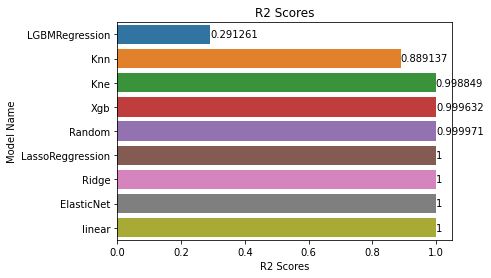

In [ ]:
g = sns.barplot(x = "R2 Score",y =  "Model Name", data = scores)
g.bar_label(g.containers[0])
g.set_xlabel("R2 Scores")
g.set_title("R2 Scores")

Text(0.5, 1.0, 'RMSE Scores')

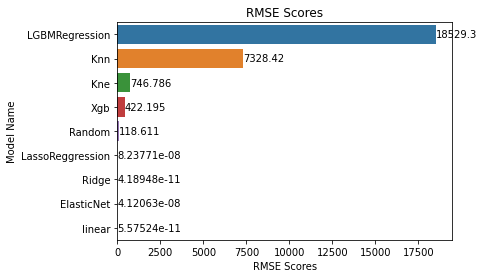

In [ ]:
g = sns.barplot(x = "Sqrt",y =  "Model Name", data = scores)
g.bar_label(g.containers[0])
g.set_xlabel("RMSE Scores")
g.set_title("RMSE Scores")

Text(0.5, 0, 'Değişken Önem Düzeyleri')

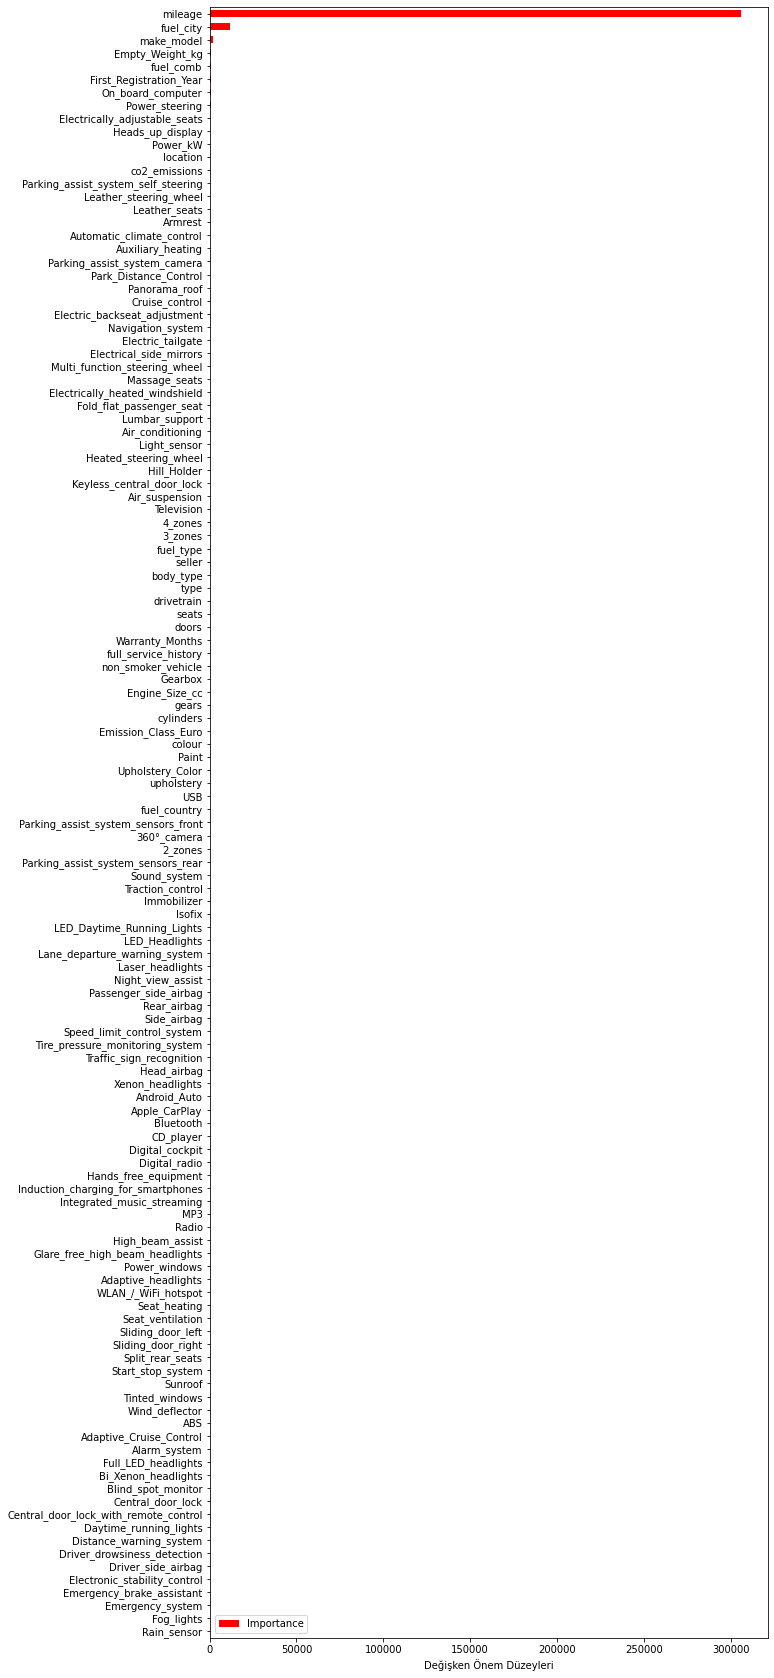

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 30]
Importance = pd.DataFrame({"Importance": gbm.feature_importances_*100},
                         index = X_train.columns)
a=Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [ ]:
gbm

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8,
              metric=['l1', 'l2'], num_iterations=100000, num_leaves=128,
              objective='regression', task='train', verbose=0)

## Variance_Inflation_Factor

In [ ]:
X = df.drop(columns = 'price')
y = df['price']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
VIF=vif_(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [ ]:

vifvalue = pd.DataFrame()
vifvalue["variables"] = X.columns
vifvalue["vifactor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [ ]:
vifvalue

,variables,vifactor
0,mileage,inf
1,fuel_type,9.060521
2,seller,2.604493
3,body_type,3.906623
4,type,206.439906
...,...,...
120,Sound_system,1.638242
121,Television,1.092968
122,USB,1.872701
123,WLAN_/_WiFi_hotspot,1.436560


In [ ]:
vif_list=(vifvalue.loc[vifvalue['vifactor'] >= 5] )
print (vif_list)

                                 variables    vifactor
0                                  mileage         inf
1                                fuel_type    9.060521
4                                     type  206.439906
5                               drivetrain    6.135435
6                                    seats   64.729424
7                                    doors   47.423222
12                          Engine_Size_cc   22.533008
13                                   gears   21.367069
14                               cylinders   51.606934
15                         Empty_Weight_kg   88.227480
16                           co2_emissions   10.046383
17                     Emission_Class_Euro   68.773142
23                               fuel_city         inf
24                            fuel_country         inf
26                                Power_kW   18.539771
27                 First_Registration_Year  533.055885
32                        Air_conditioning   35.755760
35        

In [ ]:
#according to high importance and vif we drop some columns with dependent variable
X=df.drop(['First_Registration_Year','fuel_city','fuel_country','price'], axis=1)
y = df['price']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
# y = (y -y.mean())/y.std()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state =42)

## LGBM last version

In [ ]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000
}
gbm = lgb.LGBMRegressor(**hyper_params)

In [ ]:
gbm.fit(X_train, y_train,eval_set=[(X_test, y_test)],eval_metric='l1',early_stopping_rounds=1000)

In [ ]:
joblib.dump(gbm,'/content/drive/MyDrive/pycoders/LGBMregressor.sav')

['/content/drive/MyDrive/pycoders/LGBMregressor.sav']

In [ ]:
gbm = joblib.load('/content/drive/MyDrive/pycoders/LGBMregressor.sav')

In [ ]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

In [ ]:
gbmm = r2_score(y_test, y_pred)
gbm_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print('R2 SCORE=' , gbmm)
print('RMSE SCORE=' , gbm_sqrt)

R2 SCORE= 0.3803871569992927
RMSE SCORE= 17325.12404114573


# dictionaries

In [ ]:
make_model

In [ ]:
body_type

In [ ]:
seller

In [ ]:
type

In [ ]:
drivetrain

In [ ]:
location

In [ ]:
colour

In [ ]:
Paint # drop edilenilir cunki tek cesit

In [ ]:
Upholstery_Color

In [ ]:
upholstery

In [ ]:
fuel_type

In [ ]:
Gearbox

NameError: ignored